## Problem Statement

### Context

In the dynamic landscape of the financial markets, the demand for accurate predictions of gold prices is crucial for investors, traders, and stakeholders. Similar to the challenges faced by business communities in the United States in identifying and attracting the right talent, predicting the future values of precious metals poses a significant challenge. The inherent volatility and complex dynamics influencing gold prices require a reliable forecasting tool.

The goal is to provide a valuable asset for individuals navigating the financial markets, ensuring they can approach the unpredictability of gold prices with confidence and strategic insight.

### Objective:

In the realm of financial markets, predicting the future value of gold and silver holds significant importance for investors, traders, and stakeholders. The challenge lies in the inherent volatility and complex dynamics influencing gold prices. To address this, the objective is to develop an accurate time series forecasting model that can predict the future prices of gold. The model should leverage historical gold and silver price data. The anticipated outcome is a robust forecasting tool that empowers stakeholders to make informed decisions and navigate the dynamic landscape of the gold market with confidence.


#### Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# Importing necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta


# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/sample_data/gold_prices.csv') #Complete the code to read the data and parse_dates to automatically infer datetime format for a datetime attribute

# Data Overview

In [ ]:
df.head() #Complete the code to view first 5 rows of the data

,Date,Price
0,08/17/2023,1915.2
1,08/16/2023,1928.3
2,08/15/2023,1935.2
3,08/14/2023,1944.0
4,08/11/2023,NaN


In [ ]:
df.tail() #Complete the code to view last 5 rows of the data

,Date,Price
2534,08/23/2013,NaN
2535,08/22/2013,1370.8
2536,08/21/2013,1370.1
2537,08/20/2013,1372.6
2538,08/19/2013,1365.7


In [ ]:
df.shape  #Complete the code to find the shape of the data

(2539, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2539 non-null   object 
 1   Price   2460 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.8+ KB


In [ ]:
df.describe() #Complete the code to find the statistics of the data

,Price
count,2460.000000
mean,1468.784350
std,282.977384
min,1049.600000
25%,1244.375000
50%,1322.150000
75%,1775.025000
max,2069.400000


In [ ]:
df.isnull().sum() #Check for null values

,0
Date,0
Price,79


### Missing value treatment

In [ ]:
df['Price'] = df['Price'].fillna(df['Price'].mean())  #Fill the missing values with an appropriate technique

In [ ]:
df.isnull().sum()

,0
Date,0
Price,0


In [ ]:
df.set_index('Date',inplace=True) #Complete the code to set the date column as index

# Exploratory Data Analysis

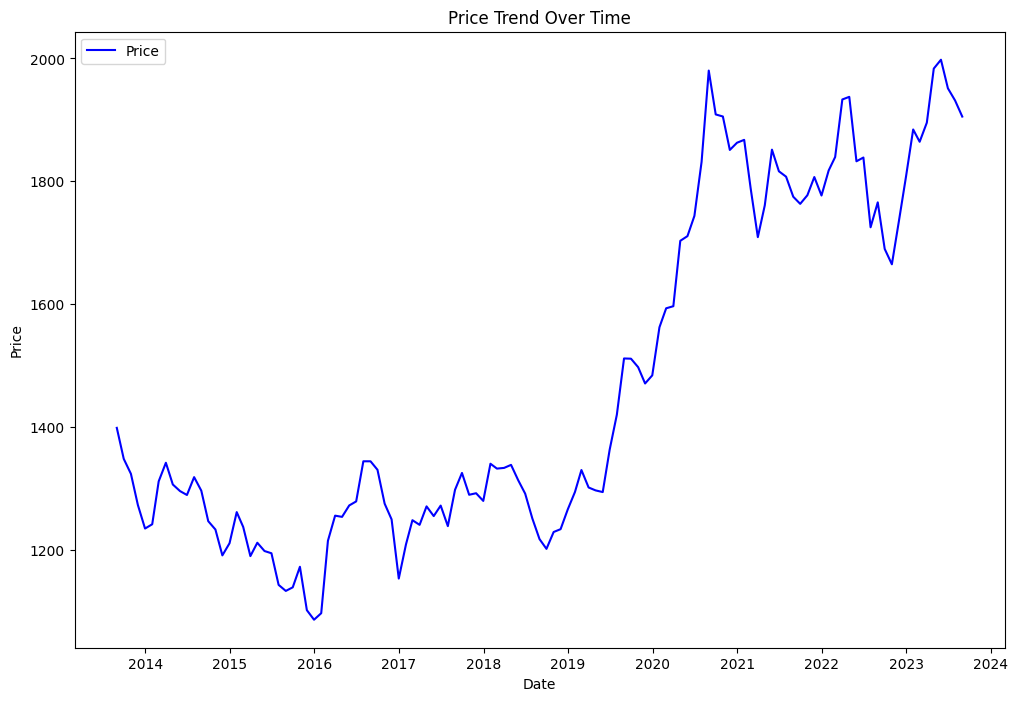

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame creation for demonstration (replace this with your actual data)
# df = pd.DataFrame({
#     'Price': [1200, 1250, 1300, 1280, 1350, 1400],
# }, index=pd.date_range(start='2023-01-01', periods=6, freq='M'))

# Convert the index to datetime if it's not already
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(12, 8))

# Plotting the price data
sns.lineplot(data=df, x=df.index, y='Price', label='Price', color='blue')

# Optionally add a trend line (remove or adjust this if not needed)
# sns.regplot(data=df, x=df.index.astype(int), y='Price', scatter=False, color='orange', label='Trend Line')

# Adding labels and title
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()


Explanation of Adjustments:
Numeric Index Conversion: The line df['Numeric_Index'] = df.index.astype(int) converts the datetime index into an integer format suitable for regression analysis.
Trend Line Implementation: The sns.regplot() line is now utilizing the new Numeric_Index for plotting the trend line without any issues related to the datetime index.
Notes:
Make sure to replace the sample data creation section with your actual DataFrame that contains price data.
You can comment out or remove the trend line code if you do not wish to visualize it.
Feel free to ask if you have more questions or need additional adjustments!

In [ ]:
import pandas as pd # Import the pandas library and alias it as 'pd'

# Convert 'Date' column to datetime if it's not already the index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date']) # Convert the 'Date' column to datetime using pd.to_datetime
    df.set_index('Date', inplace=True) # Set the 'Date' column as the index

# Check if the index is a DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    # Convert the index to DatetimeIndex if it's not
    df.index = pd.to_datetime(df.index)

# Resample data to monthly frequency and calculate the mean
df = df.resample('M').mean() # Resample the DataFrame 'df' with monthly frequency ('M') and calculate the mean of each group
df.head()

,Price
Date,
2013-08-31,1398.908435
2013-09-30,1348.461905
2013-10-31,1324.064537
2013-11-30,1273.433333
2013-12-31,1235.049289


Detailed Breakdown:
Importing Pandas:

This line imports the pandas library, which is crucial for data manipulation and analysis.
Checking for 'Date' Column:

The code checks if the 'Date' column exists in the DataFrame. If it does, it proceeds to convert the 'Date' column to datetime format.
Setting 'Date' as Index:

The set_index method sets the 'Date' column as the index of the DataFrame. This is important for time series analysis.
Index Type Check:

The code checks whether the index is of type DatetimeIndex. If it is not, it converts the index to DatetimeIndex. This ensures that subsequent time-based operations (like resampling) will work correctly.
Resampling:

The DataFrame is resampled to a monthly frequency using resample('M'), and the mean of the values in each month is calculated. This is useful for summarizing the data over time.
Displaying the Data:

df.head() displays the first few rows of the resampled DataFrame, allowing you to quickly verify that the transformations were applied correctly.

In [ ]:
#Find the shape of the data after resampling

In [ ]:
df.describe()  #Complete the code to find the statistics of the data

,Price
count,121.000000
mean,1472.077843
std,274.950834
min,1086.686276
25%,1254.056398
50%,1330.680952
75%,1765.860189
max,1997.940909


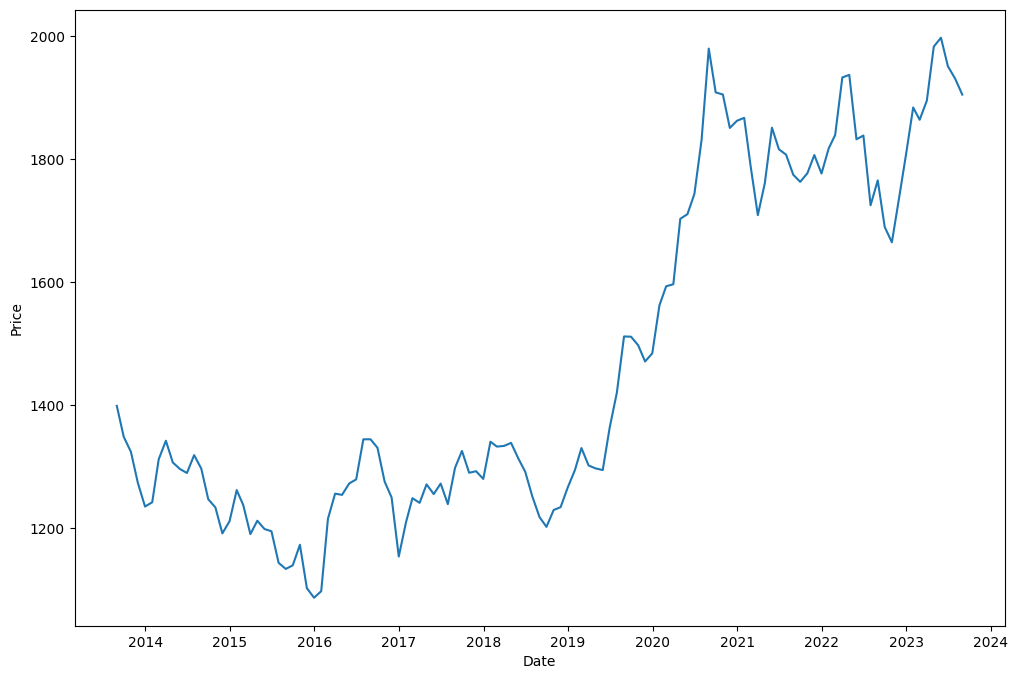

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index, y='Price') # Changed 'Value' to 'Price'
plt.show()

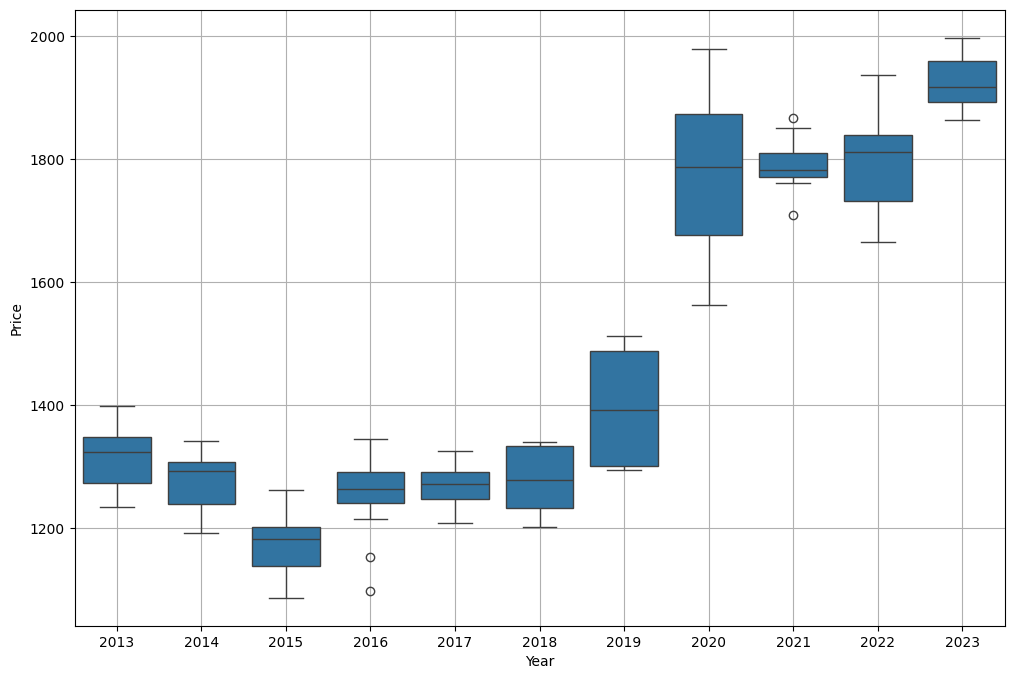

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Extract year from the index and create a new column
df['Year'] = df.index.year

# Plot the boxplot
sns.boxplot(x='Year', y='Price', data=df)

plt.grid()
plt.show()

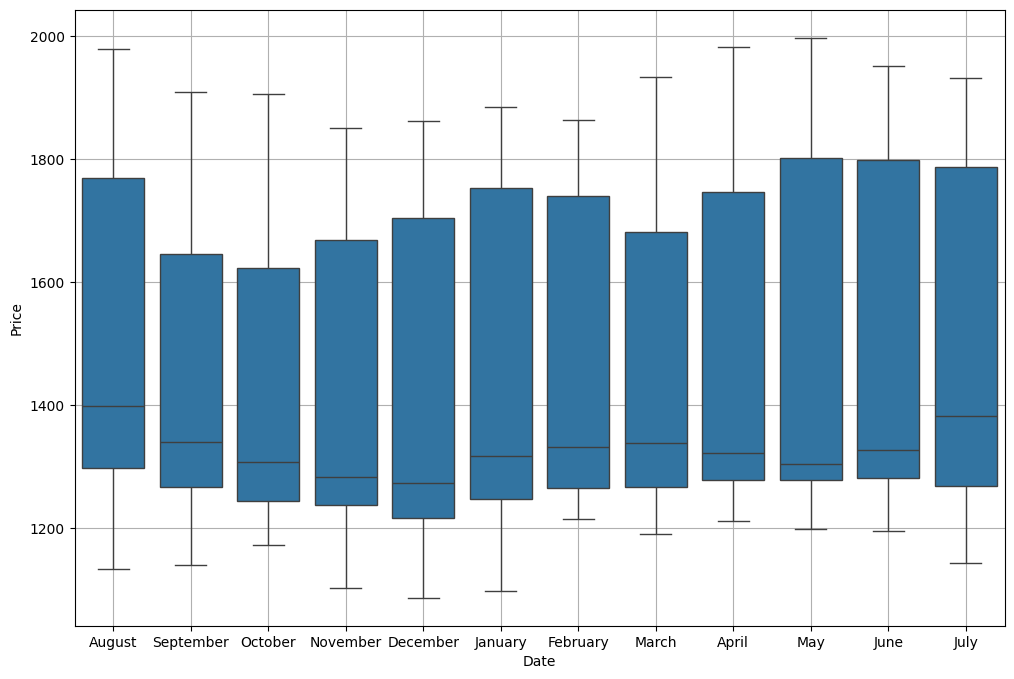

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

#Use 'boxplot' to create a boxplot
sns.boxplot(x = df.index.month_name(), y = 'Price', data=df) # Complete the code to plot a boxplot at month level

plt.grid()
plt.show()

In [ ]:
# Complete the code to create a pivot table to display monthly price across years
monthly_price_across_years = pd.pivot_table(df, values='Price', columns=df.index.month_name(), index=df.index.year)
monthly_price_across_years

Date,April,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,
2013,NaN,1398.908435,1235.049289,NaN,NaN,NaN,NaN,NaN,NaN,1273.433333,1324.064537,1348.461905
2014,1306.722016,1296.680952,1211.151493,1311.909217,1242.034783,1318.708015,1289.651636,1342.099255,1296.035652,1191.374217,1233.464537,1247.035652
2015,1211.949289,1133.542112,1086.686276,1237.649217,1261.790198,1143.381928,1194.826561,1190.208380,1198.476190,1102.213540,1172.844743,1139.390198
2016,1254.056398,1344.482609,1153.690476,1215.149217,1097.289474,1344.494217,1279.190909,1256.022016,1272.646874,1249.937350,1275.527826,1330.680952
2017,1271.136842,1298.121059,1280.014217,1248.641282,1209.089217,1238.990000,1272.422016,1241.055841,1255.344743,1292.513540,1290.017470,1325.519217
2018,1338.661905,1217.851493,1266.209217,1332.594737,1340.518302,1251.389731,1291.846874,1333.737350,1313.590198,1234.037350,1229.434102,1201.994737
2019,1297.146874,1511.818182,1484.347619,1330.272861,1294.500000,1420.322016,1363.440000,1301.871429,1294.403834,1471.104217,1497.634783,1511.449217
2020,1703.266667,1980.271429,1862.845455,1593.441282,1562.585714,1831.667470,1743.809091,1596.859091,1710.889217,1851.149217,1905.550000,1908.923064
2021,1760.909524,1774.994743,1776.981107,1788.609703,1867.557895,1807.623810,1816.403834,1709.221059,1851.620000,1807.032588,1777.428571,1763.399255


<Figure size 1500x800 with 0 Axes>

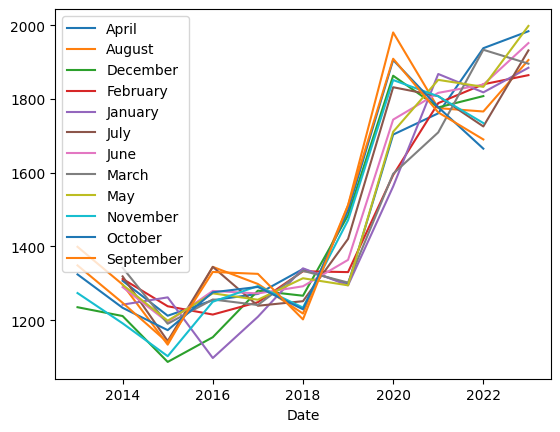

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Use the 'plot' function to create the line plot
monthly_price_across_years.plot()  # Complete the code to plot the trend of months across years

plt.legend(loc='best')
plt.show()

### Decomposition

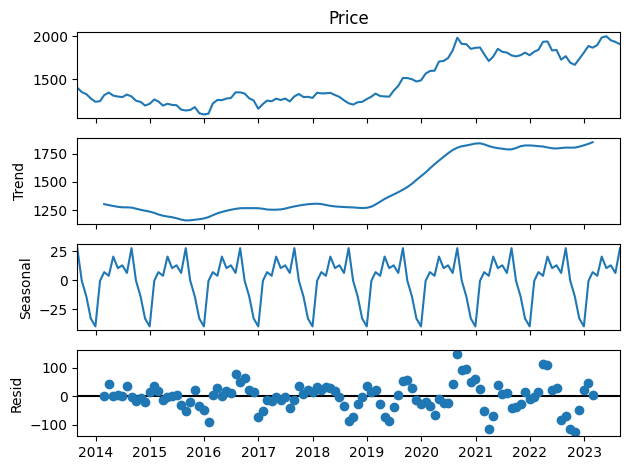

In [ ]:
# Import the necessary library
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure your DataFrame has a DateTimeIndex
df = df.set_index(pd.to_datetime(df.index))

# Decompose the time series additively using the 'Price' column
df_add_decompose = seasonal_decompose(df['Price'], model='additive')  # Use the 'Price' column as a Series

# Plot the decomposed components
df_add_decompose.plot()
plt.show()

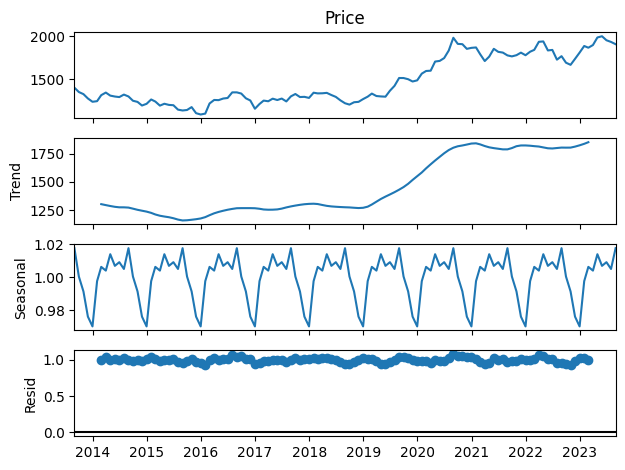

In [ ]:
# Decompose the time series multiplicatively
df_mul_decompose = seasonal_decompose(df['Price'], model='multiplicative') #Complete the code to decompose multiplicatively

df_mul_decompose.plot()   #Complte the code to plot
plt.show()

# Data Pre-processing

### Split the data into train and test and plot the training and test data.

In [ ]:
#Complete the code to split train set consisting data until 2020 and test set from 2021 onwards
train = df[df.index.year < 2021]
test = df[df.index.year >= 2021]

In [ ]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Price,Year
Date,,
2013-08-31,1398.908435,2013
2013-09-30,1348.461905,2013
2013-10-31,1324.064537,2013
2013-11-30,1273.433333,2013
2013-12-31,1235.049289,2013


Last few rows of Training Data


,Price,Year
Date,,
2020-08-31,1980.271429,2020
2020-09-30,1908.923064,2020
2020-10-31,1905.550000,2020
2020-11-30,1851.149217,2020
2020-12-31,1862.845455,2020


First few rows of Test Data


,Price,Year
Date,,
2021-01-31,1867.557895,2021
2021-02-28,1788.609703,2021
2021-03-31,1709.221059,2021
2021-04-30,1760.909524,2021
2021-05-31,1851.620000,2021


Last few rows of Test Data


,Price,Year
Date,,
2023-04-30,1983.525492,2023
2023-05-31,1997.940909,2023
2023-06-30,1951.438095,2023
2023-07-31,1931.594217,2023
2023-08-31,1905.429565,2023


In [ ]:
#Complete the code to check the shape of train and test sets
print(train.shape)
print(test.shape)

(89, 2)
(32, 2)


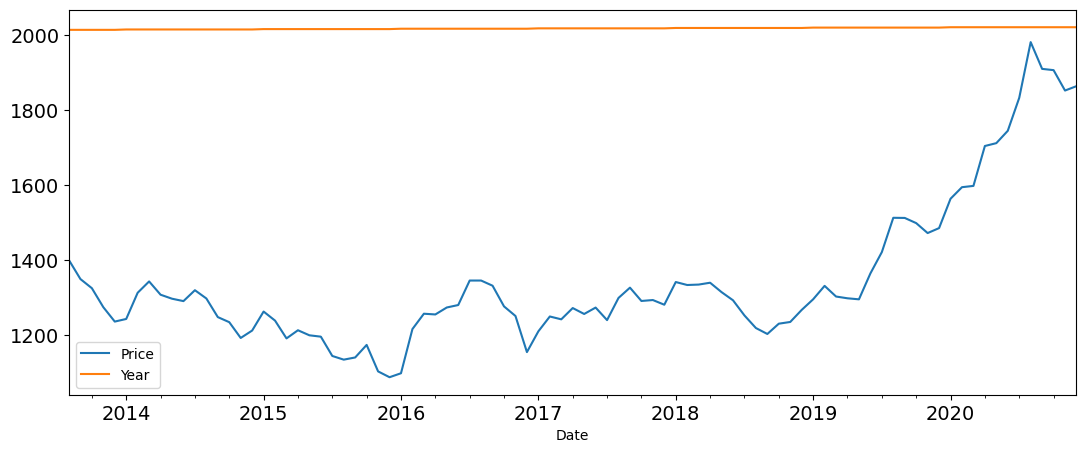

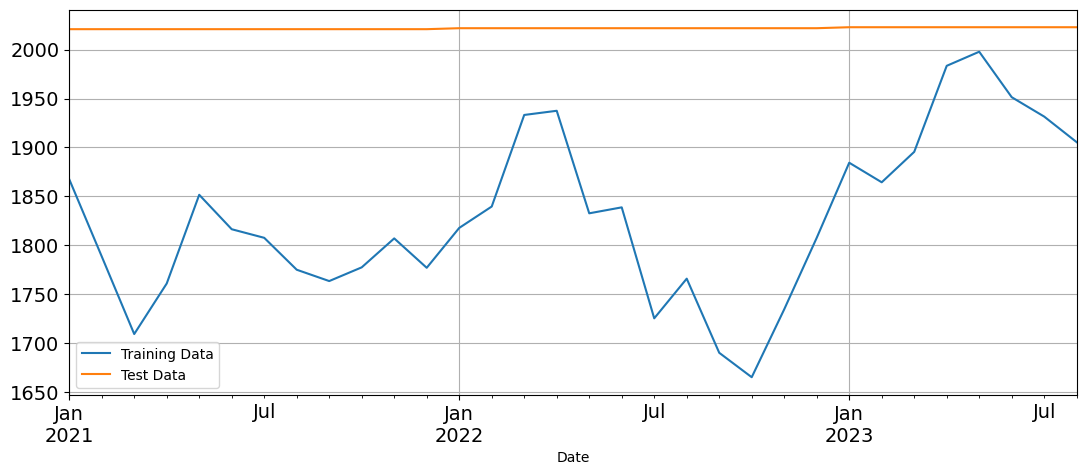

In [ ]:
train.plot(figsize=(13,5), fontsize=14) #Complete the code to find the trend of train data
test.plot(figsize=(13,5), fontsize=14)  #Complete the code to find the trend of test data
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model Building - Original Data

### Linear Regression

In [ ]:
#Complete the code to generate the numerical time instance order for both the training and test set.
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train) for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
Test Time instance 
 [89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]


In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
                   Price  Year  time
Date                               
2013-08-31  1398.908435  2013     1
2013-09-30  1348.461905  2013     2
2013-10-31  1324.064537  2013     3
2013-11-30  1273.433333  2013     4
2013-12-31  1235.049289  2013     5 

Last few rows of Training Data 
                   Price  Year  time
Date                               
2020-08-31  1980.271429  2020    85
2020-09-30  1908.923064  2020    86
2020-10-31  1905.550000  2020    87
2020-11-30  1851.149217  2020    88
2020-12-31  1862.845455  2020    89 

First few rows of Test Data 
                   Price  Year  time
Date                               
2021-01-31  1867.557895  2021    89
2021-02-28  1788.609703  2021    90
2021-03-31  1709.221059  2021    91
2021-04-30  1760.909524  2021    92
2021-05-31  1851.620000  2021    93 

Last few rows of Test Data 
                   Price  Year  time
Date                               
2023-04-30  1983.525492  2023   116
2023

* Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛
  to build the model on the training data and test the model on the test data.*

In [ ]:
lr = LinearRegression() #Complete the code to define the linear regression model

In [ ]:
lr.fit(train.index.values.reshape(-1, 1), train.values)  #Complete the code to build the linear regression model

LinearRegression()

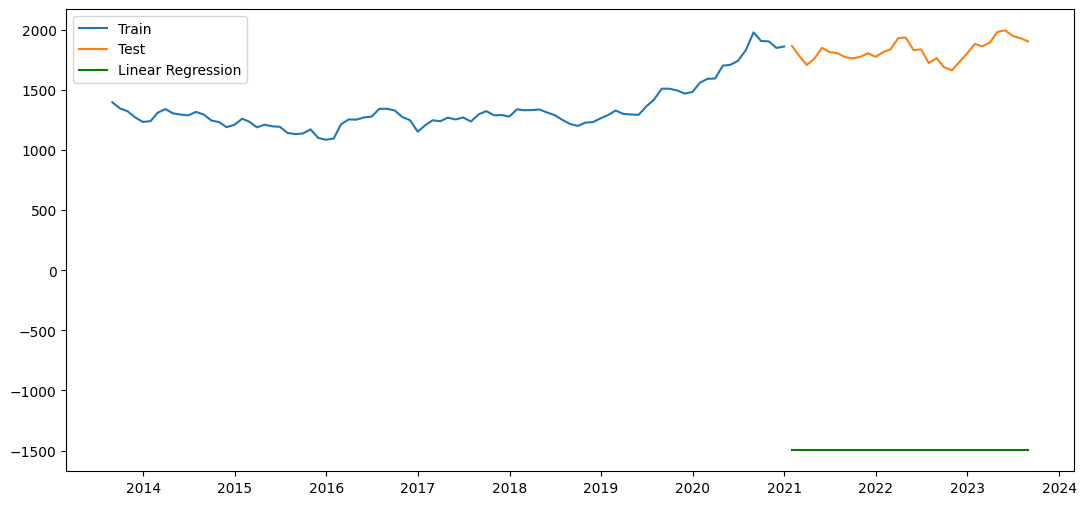

In [ ]:
test_predictions_model1 = lr.predict(np.arange(len(test)).reshape(-1, 1))[:, 0]  # Use a numeric range for prediction and select the first column of the predictions
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color='green')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error # import the module for calculating mean squared error

rmse_model1_test = mean_squared_error(test['Price'],test_predictions_model1,squared=False) # Complete the code to find the RMSE on test data
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3326.85


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,3326.854051


### Moving Average (MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [ ]:
MovingAverage = df.copy()
MovingAverage.head()

,Price,Year
Date,,
2013-08-31,1398.908435,2013
2013-09-30,1348.461905,2013
2013-10-31,1324.064537,2013
2013-11-30,1273.433333,2013
2013-12-31,1235.049289,2013


In [ ]:
#Trailing Moving Average

MovingAverage['Trailing_2'] = MovingAverage['Price'].rolling(2).mean() #Complete the code to find 2 point trailing average
MovingAverage['Trailing_4'] = MovingAverage['Price'].rolling(4).mean()#Complete the code to find 4 point trailing average
MovingAverage['Trailing_6'] = MovingAverage['Price'].rolling(6).mean()#Complete the code to find 6 point trailing average
MovingAverage['Trailing_9'] = MovingAverage['Price'].rolling(9).mean()#Complete the code to find 9 point trailing average

MovingAverage.head()

,Price,Year,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,,
2013-08-31,1398.908435,2013,NaN,NaN,NaN,NaN
2013-09-30,1348.461905,2013,1373.685170,NaN,NaN,NaN
2013-10-31,1324.064537,2013,1336.263221,NaN,NaN,NaN
2013-11-30,1273.433333,2013,1298.748935,1336.217052,NaN,NaN
2013-12-31,1235.049289,2013,1254.241311,1295.252266,NaN,NaN


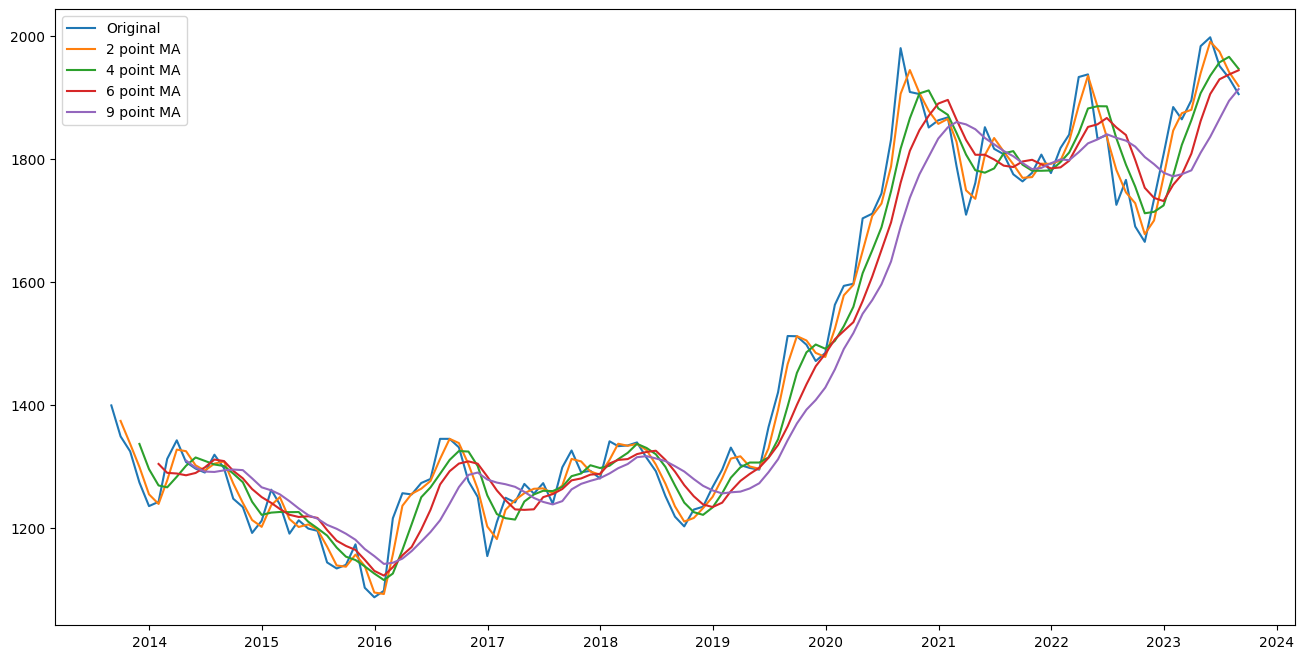

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Price'], label='Original') # Changed label to 'Original' for clarity
plt.plot(MovingAverage['Trailing_2'], label='2 point MA') #Complete the code to plot the 2 point moving average
plt.plot(MovingAverage['Trailing_4'], label='4 point MA') #Complete the code to plot the 4 point moving average
plt.plot(MovingAverage['Trailing_6'], label='6 point MA') #Complete the code to plot the 6 point moving average
plt.plot(MovingAverage['Trailing_9'], label='9 point MA') #Complete the code to plot the 9 point moving average
plt.legend(loc='best')
plt.show()

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [ ]:
#Creating train and test set
trailing_MovingAverage_train= MovingAverage[MovingAverage.index.year < 2021]
trailing_MovingAverage_test= MovingAverage[MovingAverage.index.year >= 2021]


In [ ]:
from sklearn.metrics import mean_squared_error # Import the mean_squared_error function


## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = mean_squared_error(test['Price'],trailing_MovingAverage_test['Trailing_2'],squared=False) #Calculate the RMSE for the 2 point moving average using the correct column name and the imported function.
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = mean_squared_error(test['Price'],trailing_MovingAverage_test['Trailing_4'],squared=False) #Calculate the RMSE for the 4 point moving average.

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = mean_squared_error(test['Price'],trailing_MovingAverage_test['Trailing_6'],squared=False)  #Calculate the RMSE for the 6 point moving average

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = mean_squared_error(test['Price'],trailing_MovingAverage_test['Trailing_9'],squared=False) #Calculate the RMSE for the 9 point moving average

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 27.872


In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,3326.854051
2pointTrailingMovingAverage,27.871919
4pointTrailingMovingAverage,54.239048
6pointTrailingMovingAverage,69.512886
9pointTrailingMovingAverage,83.336308


Before we go on to build the various Exponential Smoothing models, let us plot all the best models and compare the Time Series plots.

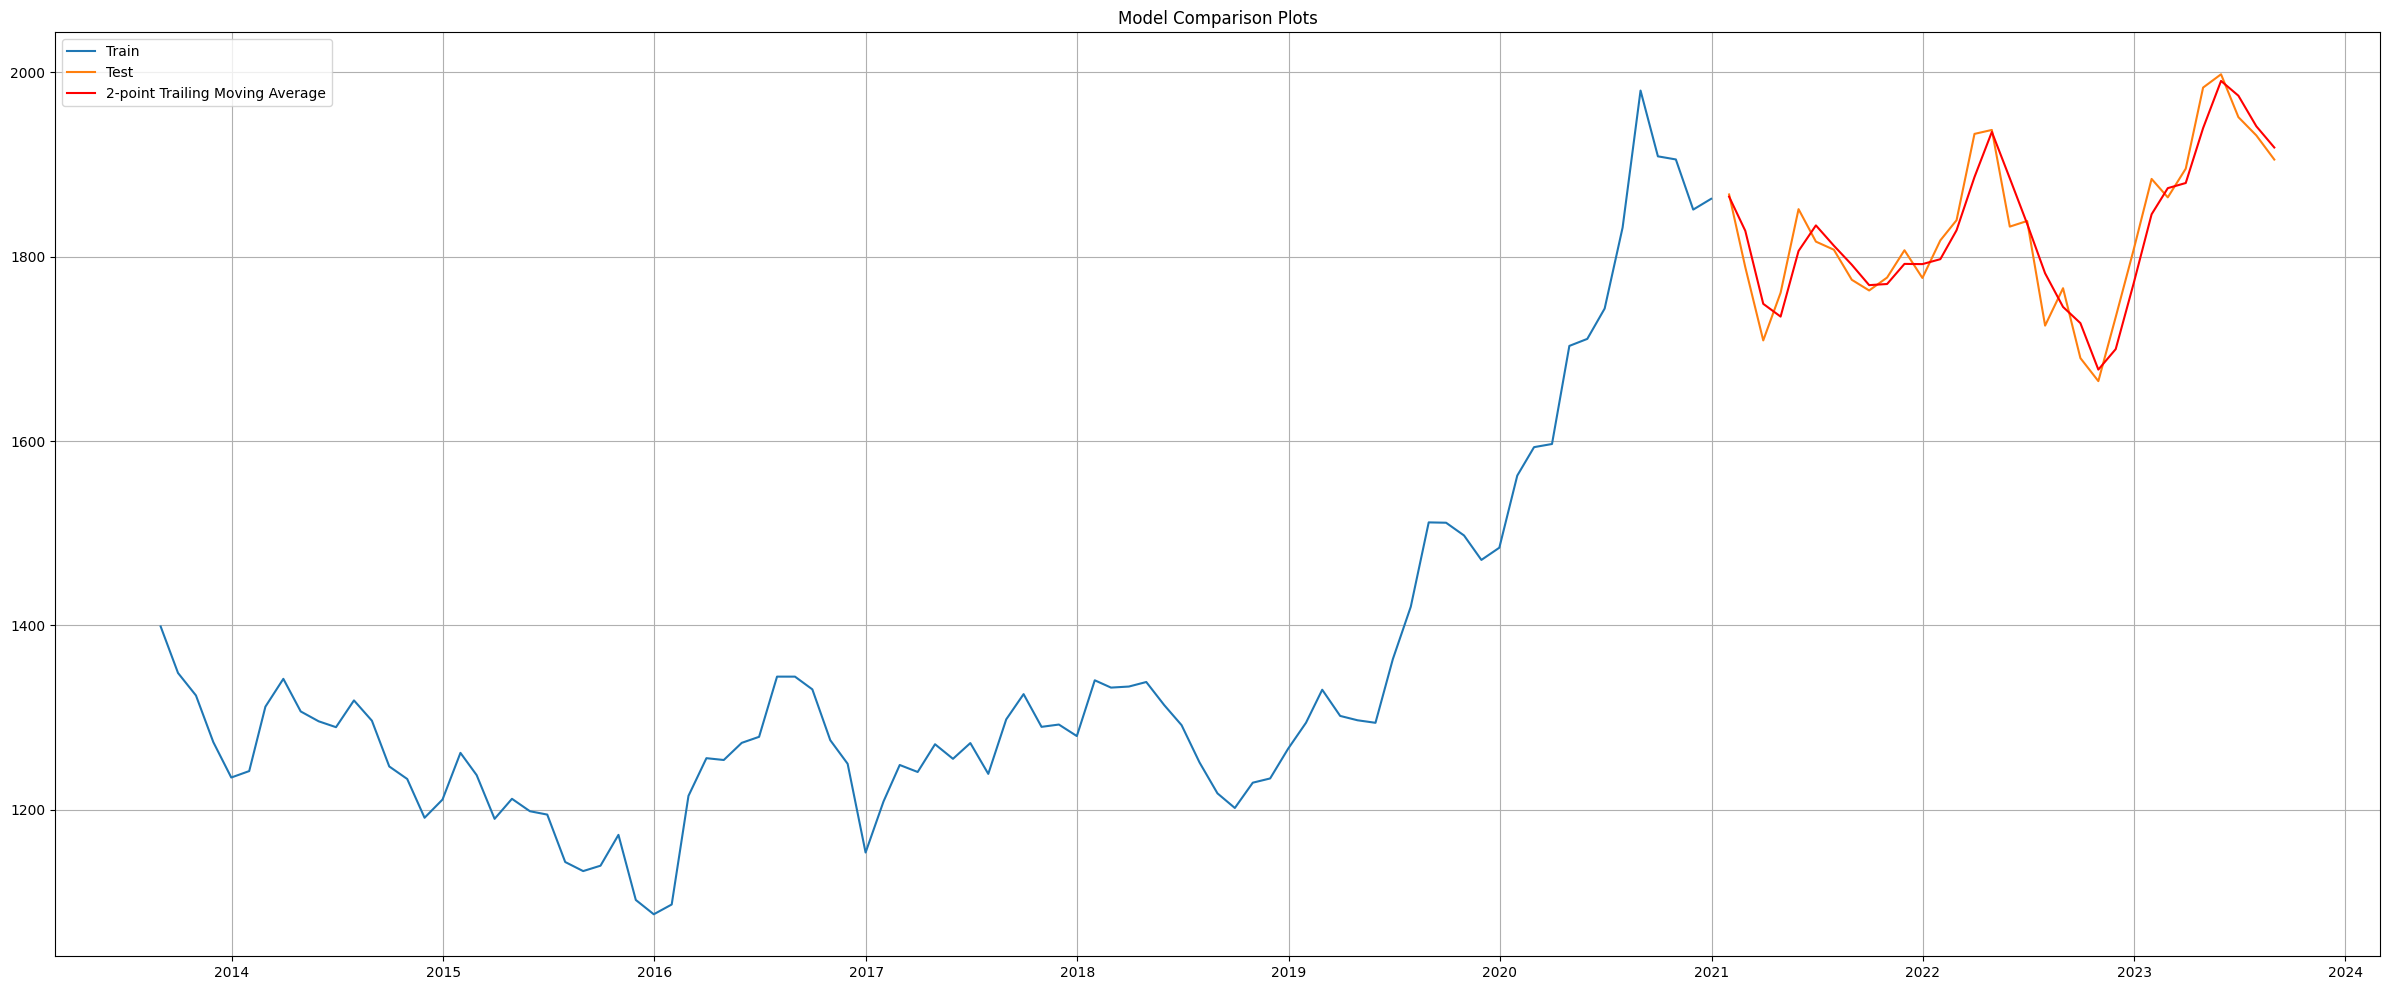

In [ ]:
plt.figure(figsize=(30,12))

# Plotting the training and test data
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')

# Plotting the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2-point Trailing Moving Average', color='red')

# Adding legend, title, and grid for clarity
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid()


### Simple Exponential Smoothening Models

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
!pip install statsmodels
import statsmodels.tsa.holtwinters as ets

model_SES = ets.SimpleExpSmoothing(SES_train['Price']).fit() #Define the simple exponential smoothening model using statsmodels library

In [ ]:
# The model has already been fit in the previous step.
# model_SES_autofit = model_SES.fit(optimized=True)   #Fit the simple exponential smoothening model with optimized parameters

# Access the fitted values using the `fittedvalues` attribute
model_SES_autofit = model_SES.fittedvalues

In [ ]:
!pip install statsmodels
import statsmodels.tsa.holtwinters as ets

model_SES = ets.SimpleExpSmoothing(SES_train['Price']).fit() #Define the simple exponential smoothening model using statsmodels library

# Access the parameters of the fitted model using the `params` attribute of the model
model_SES_params = model_SES.params

# Access the fitted values using the `fittedvalues` attribute
model_SES_fittedvalues = model_SES.fittedvalues

# Now you can access the parameters using model_SES_params
model_SES_params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1398.9084349593495,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
SES_test['predict'] = model_SES.forecast(steps=len(test))   #Forecast the model
SES_test.head()

,Price,Year,predict
Date,,,
2021-01-31,1867.557895,2021,1862.788334
2021-02-28,1788.609703,2021,1862.788334
2021-03-31,1709.221059,2021,1862.788334
2021-04-30,1760.909524,2021,1862.788334
2021-05-31,1851.620000,2021,1862.788334


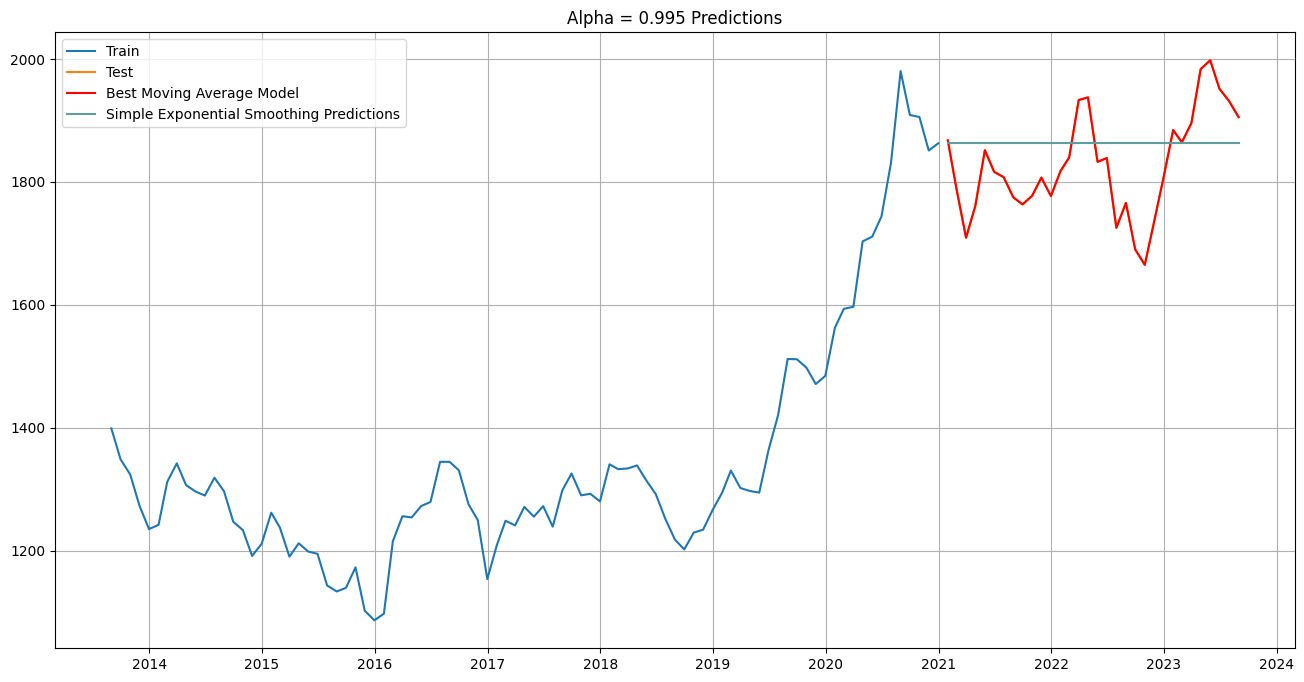

In [ ]:
plt.figure(figsize=(16, 8))

# Plot Training and Test data
plt.plot(SES_train['Price'], label='Train')
plt.plot(SES_test['Price'], label='Test')

# You need to define and assign values to linear_regression_predictions before using it
# linear_regression_predictions = # ... your code to generate predictions ...

# Plot Linear Regression predictions
# plt.plot(SES_test.index, linear_regression_predictions, label='Linear Regression', color='green')

# Plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test.index, trailing_MovingAverage_test['Price'], label='Best Moving Average Model', color='red')

# Plot the predictions based on the simple exponential smoothing model
# Changed 'Predicted_Sales' to 'predict'
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing Predictions', color='cadetblue')

# Add a legend, grid, and title
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.995 Predictions')

# Show the plot
plt.show()

Model Evaluation for  𝛼
  = 0.995 : Simple Exponential Smoothing

In [ ]:
## Test Data
#Complete the code to find the RMSE of simple exponential smoothening model
rmse_model5_test_1 = mean_squared_error(SES_test['Price'],SES_test['predict'],squared=False) #Replaced the strings with the appropriate function and its arguments
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 90.187


In [ ]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
Linear Regression,3326.854051
2pointTrailingMovingAverage,27.871919
4pointTrailingMovingAverage,54.239048
6pointTrailingMovingAverage,69.512886
9pointTrailingMovingAverage,83.336308
"Alpha=0.995,SimpleExponentialSmoothing",90.186647


### Double Exponential Smoothening (Holt's Model)

Two parameters  𝛼
  and  𝛽
  are estimated in this model. Level and Trend are accounted for in this model.

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
from statsmodels.tsa.holtwinters import Holt

model_DES = Holt(train['Price']) # Define the double exponential smoothing model using the Holt class and the training data

In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [ ]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True) #fit the model using the appropriate method and parameters
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=37)  #Forecast the model using the correct method name

        rmse_model6_train = mean_squared_error(DES_train['Price'],DES_train['predict',i,j], squared=False) # Calculate RMSE using the mean_squared_error function and appropriate arguments
        rmse_model6_test = mean_squared_error(DES_test['Price'],DES_test['predict',i,j], squared=False)

        print("For Alpha =%3.2f, Beta = %3.2f  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is %3.3f" %(i,j,rmse_model6_train))
        print("For Alpha =%3.2f, Beta = %3.2f  Double Exponential Smoothing Model's forecast on the Test Data, RMSE is %3.3f" %(i,j,rmse_model6_test))

For Alpha =0.30, Beta = 0.30  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is 65.404
For Alpha =0.30, Beta = 0.30  Double Exponential Smoothing Model's forecast on the Test Data, RMSE is 518.317
For Alpha =0.30, Beta = 0.40  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is 65.662
For Alpha =0.30, Beta = 0.40  Double Exponential Smoothing Model's forecast on the Test Data, RMSE is 379.334
For Alpha =0.30, Beta = 0.50  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is 65.910
For Alpha =0.30, Beta = 0.50  Double Exponential Smoothing Model's forecast on the Test Data, RMSE is 209.750
For Alpha =0.30, Beta = 0.60  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is 66.092
For Alpha =0.30, Beta = 0.60  Double Exponential Smoothing Model's forecast on the Test Data, RMSE is 132.233
For Alpha =0.30, Beta = 0.70  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is 66

In [ ]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE


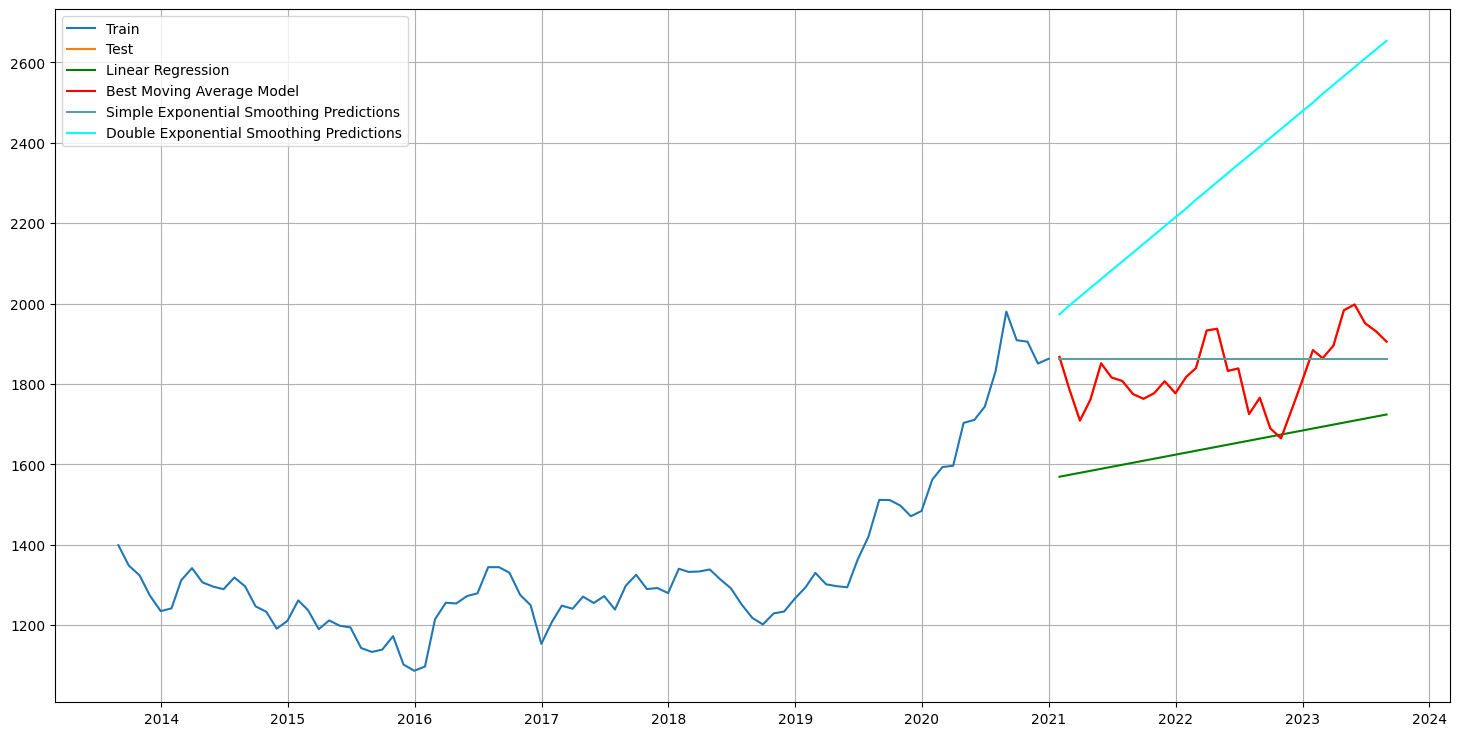

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(18, 9))

# Plot the Training and Test data
plt.plot(DES_train['Price'], label='Train')
plt.plot(DES_test['Price'], label='Test')

# Convert the datetime index to ordinal values for linear regression
X_train = np.array(DES_train.index.map(pd.Timestamp.toordinal)).reshape(-1, 1)
X_test = np.array(DES_test.index.map(pd.Timestamp.toordinal)).reshape(-1, 1)

# Fit the Linear Regression model using ordinal values
model = LinearRegression().fit(X_train, DES_train['Price'])

# Generate predictions using the Linear Regression model
linear_regression_predictions = model.predict(X_test)

# Plot the predictions made by the linear regression model
plt.plot(DES_test.index, linear_regression_predictions, label='Linear Regression', color='green')

# Plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Price'], label='Best Moving Average Model', color='red')

# Plot the predictions based on the simple exponential smoothing model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing Predictions', color='cadetblue')

# Plot the predictions based on the double exponential smoothing model
# Assuming the correct column format is ('predict', 0.3, 0.3)
# Make sure the tuple column is correctly formatted
if ('predict', 0.3, 0.3) in DES_test.columns:
    plt.plot(DES_test[('predict', 0.3, 0.3)], label='Double Exponential Smoothing Predictions', color='cyan')
else:
    print("Column ('predict', 0.3, 0.3) not found in DES_test")

# Add legend and grid
plt.legend(loc='best')
plt.grid()

# Show the plot
plt.show()


In [ ]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True) #fit the model using the appropriate method and parameters
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=37)  #Forecast the model using the correct method name

        rmse_model6_train = mean_squared_error(DES_train['Price'],DES_train['predict',i,j], squared=False) # Calculate RMSE using the mean_squared_error function and appropriate arguments
        rmse_model6_test = mean_squared_error(DES_test['Price'],DES_test['predict',i,j], squared=False)

        print("For Alpha =%3.2f, Beta = %3.2f  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is %3.3f" %(i,j,rmse_model6_train))
        print("For Alpha =%3.2f, Beta = %3.2f  Double Exponential Smoothing Model's forecast on the Test Data, RMSE is %3.3f" %(i,j,rmse_model6_test))

        # Append the results to the DataFrame using concat
        new_row = {'Alpha Values': i, 'Beta Values': j, 'Train RMSE': rmse_model6_train, 'Test RMSE': rmse_model6_test}
        resultsDf_7 = pd.concat([resultsDf_7, pd.DataFrame([new_row])], ignore_index=True)



For Alpha =0.30, Beta = 0.30  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is 65.404
For Alpha =0.30, Beta = 0.30  Double Exponential Smoothing Model's forecast on the Test Data, RMSE is 518.317
For Alpha =0.30, Beta = 0.40  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is 65.662
For Alpha =0.30, Beta = 0.40  Double Exponential Smoothing Model's forecast on the Test Data, RMSE is 379.334
For Alpha =0.30, Beta = 0.50  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is 65.910
For Alpha =0.30, Beta = 0.50  Double Exponential Smoothing Model's forecast on the Test Data, RMSE is 209.750
For Alpha =0.30, Beta = 0.60  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is 66.092
For Alpha =0.30, Beta = 0.60  Double Exponential Smoothing Model's forecast on the Test Data, RMSE is 132.233
For Alpha =0.30, Beta = 0.70  Double Exponential Smoothing Model's forecast on the Training Data, RMSE is 66

In [ ]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
Linear Regression,3326.854051
2pointTrailingMovingAverage,27.871919
4pointTrailingMovingAverage,54.239048
6pointTrailingMovingAverage,69.512886
9pointTrailingMovingAverage,83.336308
"Alpha=0.995,SimpleExponentialSmoothing",90.186647
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",91.155144


### Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  𝛼
 ,  𝛽
  and  𝛾
  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_TES = ExponentialSmoothing(TES_train['Price'],trend='add',seasonal='add')  #Define the triple exponential smoothening model
#The ExponentialSmoothing class is used to create a triple exponential smoothing model.
#The trend and seasonal parameters are set to 'add' to define the type of model

In [ ]:
model_TES_autofit = model_TES.fit()   #Fit the triple exponential smoothening model

In [ ]:
model_TES_autofit.params

{'smoothing_level': 0.9999102868625672,
 'smoothing_trend': 0.0671814268231656,
 'smoothing_seasonal': 1.6218752073740257e-06,
 'damping_trend': nan,
 'initial_level': 1356.1546341577118,
 'initial_trend': -5.689836639756897,
 'initial_seasons': array([ 48.12376065,  20.88608758,   3.85560082, -35.74274018,
        -53.55275496, -17.12754736,  14.72398039,   7.75381408,
         18.91961603,   6.45141672,  13.06715724,  22.2601689 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.predict(start=len(TES_train), end=len(TES_train)+len(TES_test)-1)  #Forecast the triple exponential smoothening model
TES_test.head()

,Price,Year,auto_predict
Date,,,
2021-01-31,1867.557895,2021,1921.874445
2021-02-28,1788.609703,2021,1976.330410
2021-03-31,1709.221059,2021,1991.964680
2021-04-30,1760.909524,2021,2025.734917
2021-05-31,1851.620000,2021,2035.871154


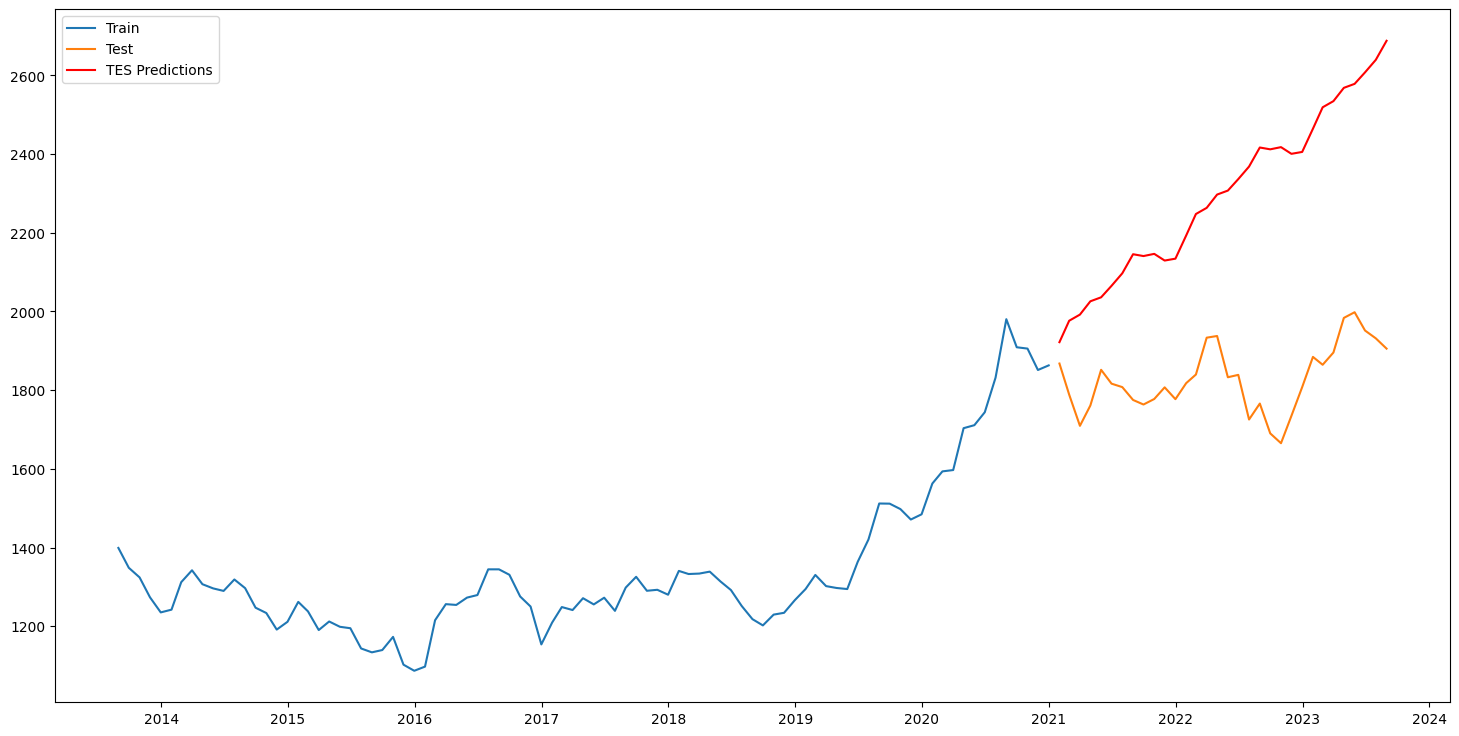

In [ ]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Price'], label='Train')
plt.plot(TES_test['Price'], label='Test')
plt.plot(TES_test['auto_predict'], label='TES Predictions', color='red') # Plot TES predictions

# Assuming you have a 'predictions' column in your TES_test DataFrame from a linear regression model
# plt.plot(TES_test['predictions'], label='Linear Regression', color='green')

plt.legend(loc='best')
plt.show()

In [ ]:
## Test Data

from sklearn.metrics import mean_squared_error
rmse_model6_test_1 = mean_squared_error(TES_test['Price'],TES_test['auto_predict'],squared=False) #Find the RMSE on test data
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 504.763


In [ ]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
Linear Regression,3326.854051
2pointTrailingMovingAverage,27.871919
4pointTrailingMovingAverage,54.239048
6pointTrailingMovingAverage,69.512886
9pointTrailingMovingAverage,83.336308
"Alpha=0.995,SimpleExponentialSmoothing",90.186647
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",91.155144
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",504.763166


In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [ ]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True) #Fit the model
            TES_train[('predict',i,j,k)] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[('predict',i,j,k)] = model_TES_alpha_i_j_k.predict(start=len(TES_train), end=len(TES_train)+len(TES_test)-1)

In [ ]:
!pip install statsmodels
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming you have TES_train and TES_test DataFrames and a model_TES object

for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        for k in np.arange(0.3, 1.1, 0.1):
            # Fit the TES model with different smoothing parameters
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k, optimized=False, use_brute=True)

            # Generate predictions for train and test sets
            TES_train[f'predict_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[f'predict_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))

In [ ]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [ ]:
list(TES_test.columns)

['Price',
 'Year',
 'auto_predict',
 ('predict', 0.3, 0.3, 0.3),
 ('predict', 0.3, 0.3, 0.4),
 ('predict', 0.3, 0.3, 0.5),
 ('predict', 0.3, 0.3, 0.6000000000000001),
 ('predict', 0.3, 0.3, 0.7000000000000002),
 ('predict', 0.3, 0.3, 0.8000000000000003),
 ('predict', 0.3, 0.3, 0.9000000000000001),
 ('predict', 0.3, 0.3, 1.0000000000000002),
 ('predict', 0.3, 0.4, 0.3),
 ('predict', 0.3, 0.4, 0.4),
 ('predict', 0.3, 0.4, 0.5),
 ('predict', 0.3, 0.4, 0.6000000000000001),
 ('predict', 0.3, 0.4, 0.7000000000000002),
 ('predict', 0.3, 0.4, 0.8000000000000003),
 ('predict', 0.3, 0.4, 0.9000000000000001),
 ('predict', 0.3, 0.4, 1.0000000000000002),
 ('predict', 0.3, 0.5, 0.3),
 ('predict', 0.3, 0.5, 0.4),
 ('predict', 0.3, 0.5, 0.5),
 ('predict', 0.3, 0.5, 0.6000000000000001),
 ('predict', 0.3, 0.5, 0.7000000000000002),
 ('predict', 0.3, 0.5, 0.8000000000000003),
 ('predict', 0.3, 0.5, 0.9000000000000001),
 ('predict', 0.3, 0.5, 1.0000000000000002),
 ('predict', 0.3, 0.6000000000000001, 0.3),

Column 'Linear_Regression_Predictions' not found in TES_test DataFrame.
Column 'Moving_Average_Predictions' not found in trailing_MovingAverage_test DataFrame.
Column 'SES_Predictions' not found in SES_test DataFrame.
Column 'DES_Predictions' not found in DES_test DataFrame.
Column 'TES_Predictions' not found in TES_test DataFrame.


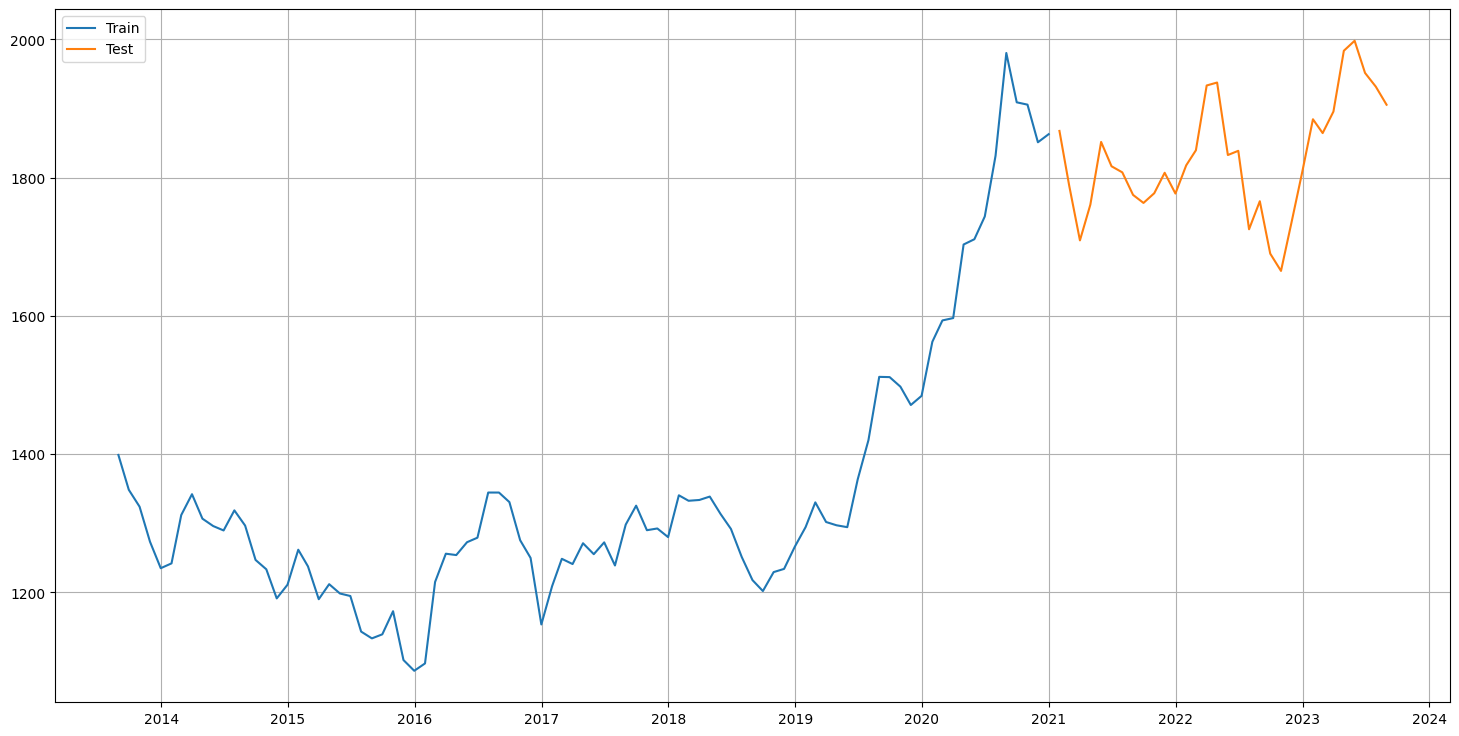

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Price'], label='Train')
plt.plot(TES_test['Price'], label='Test')

# Check if 'Linear_Regression_Predictions' exists in TES_test
if 'Linear_Regression_Predictions' in TES_test.columns:
    plt.plot(TES_test['Linear_Regression_Predictions'], label='Linear Regression', color='green')
else:
    print("Column 'Linear_Regression_Predictions' not found in TES_test DataFrame.")
    # Add code here to generate linear regression predictions if needed

# Complete the code to plot the predictions based on the best moving average model
if 'Moving_Average_Predictions' in trailing_MovingAverage_test.columns:
    plt.plot(trailing_MovingAverage_test['Moving_Average_Predictions'], label='Moving Average', color='red')
else:
    print("Column 'Moving_Average_Predictions' not found in trailing_MovingAverage_test DataFrame.")
    # Add code here to generate moving average predictions if needed

# Complete the code to plot the predictions based on the simple exponential smoothing model
if 'SES_Predictions' in SES_test.columns:
    plt.plot(SES_test['SES_Predictions'], label='Simple Exponential Smoothing', color='cadetblue')
else:
    print("Column 'SES_Predictions' not found in SES_test DataFrame.")
    # Add code here to generate SES predictions if needed

# Complete the code to plot the predictions based on the double exponential smoothing model
if 'DES_Predictions' in DES_test.columns:
    plt.plot(DES_test['DES_Predictions'], label='Double Exponential Smoothing', color='cyan')
else:
    print("Column 'DES_Predictions' not found in DES_test DataFrame.")
    # Add code here to generate DES predictions if needed

# Complete the code to plot the predictions based on the triple exponential smoothing model
if 'TES_Predictions' in TES_test.columns:
    plt.plot(TES_test['TES_Predictions'], label='Triple Exponential Smoothing', color='purple')
else:
    print("Column 'TES_Predictions' not found in TES_test DataFrame.")
    # Add code here to generate TES predictions if needed

plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
# Check if resultsDf_8_2 is empty
if resultsDf_8_2.empty:
    print("resultsDf_8_2 is empty. Please check the data or previous calculations.")
    # Handle the empty DataFrame, e.g., create a default value or skip the operation
else:
    resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]},
                               index=['Alpha=0.8,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing'])

    results_Df = pd.concat([resultsDf, resultsDf_8_3])
    results_Df

resultsDf_8_2 is empty. Please check the data or previous calculations.


In [ ]:
# Check if resultsDf_8_2 is empty
if resultsDf_8_2.empty:
    print("resultsDf_8_2 is empty. Please check the data or previous calculations.")
    # Handle the empty DataFrame, e.g., create a default value or skip the operation
    results_Df = pd.DataFrame() # Create an empty DataFrame if resultsDf_8_2 is empty
else:
    resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]},
                               index=['Alpha=0.8,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing'])

    results_Df = pd.concat([resultsDf, resultsDf_8_3])

results_Df # Make sure to output the DataFrame

resultsDf_8_2 is empty. Please check the data or previous calculations.


""


# Check for stationarity of the whole Time Series data.

In [ ]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

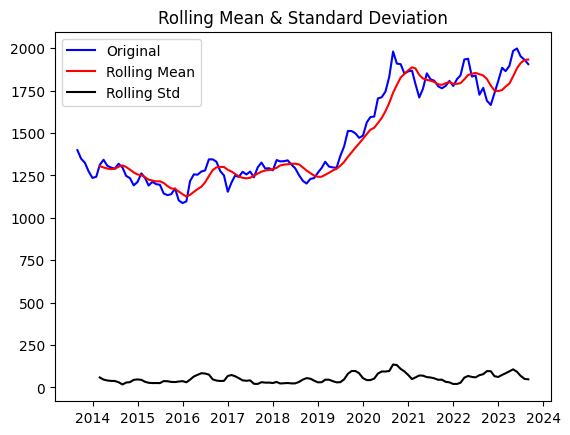

Results of Dickey-Fuller Test:
Test Statistic                  -0.584566
p-value                          0.874432
#Lags Used                       1.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [ ]:
# Check if 'Price' column exists in the DataFrame
if 'Price' in df.columns:
    test_stationarity(df['Price']) # Assuming your DataFrame is named 'df'
else:
    print("Column 'Price' not found in the DataFrame. Please check the column name.")
    # Handle the missing column, e.g., use a different column or skip the operation

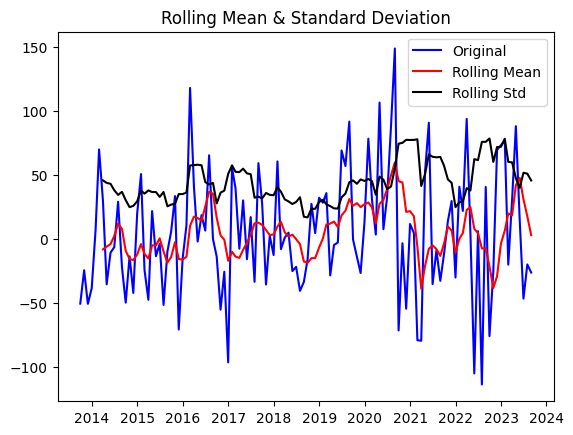

Results of Dickey-Fuller Test:
Test Statistic                -9.342889e+00
p-value                        8.700778e-16
#Lags Used                     0.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [ ]:
# Check if a DataFrame named 'df' exists and has data
if 'df' in locals() and not df.empty:
    # Check if 'Price' column exists in the DataFrame
    if 'Price' in df.columns:
        # Apply differencing to the 'Price' column if it exists and drop NaNs
        test_stationarity(df['Price'].diff().dropna()) # Drop NaNs after differencing
    else:
        print("Column 'Price' not found in the DataFrame. Please check the column name.")
        # Handle the missing column, e.g., use a different column or skip the operation
else:
    print("DataFrame 'df' is not defined or is empty. Please check your data.")

# Model Building - Stationary Data

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

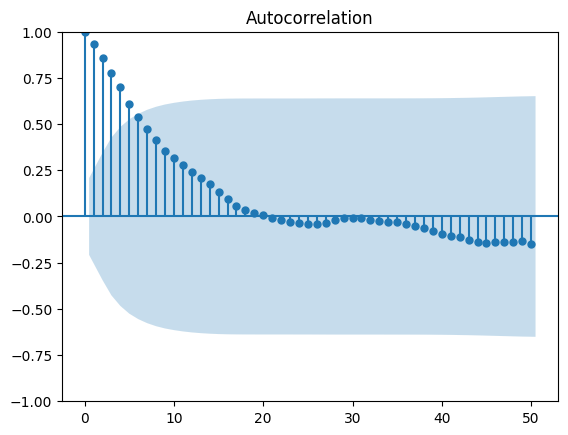

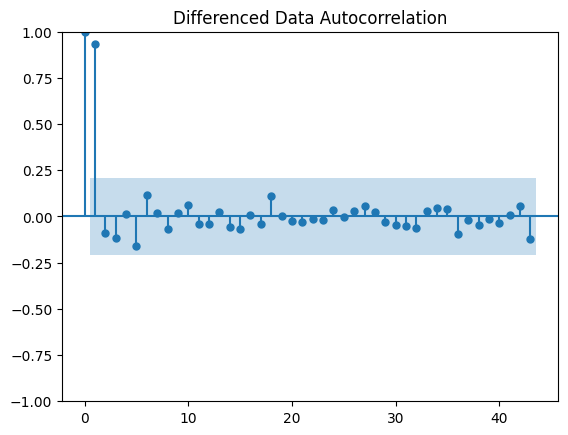

In [ ]:
# Complete the code to plot the ACF plot
plot_acf(TES_train['Price'], lags=50)

# Calculate the maximum lag based on the sample size
max_lag = len(TES_train['Price']) // 2 - 1

# Complete the code to plot the PACF plot with adjusted lags
plot_pacf(TES_train['Price'], lags=max_lag, title='Differenced Data Autocorrelation')

plt.show()

### Auto ARIMA Model

In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d = [1]  # Setting d as a list with a value of 1 to ensure first-order differencing
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1, len(pdq)):
    print('Model: {}'.format(pdq[i]))


Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= '___' #complete the code to ensure stationarity
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, '_', 1)
Model: (0, '_', 2)
Model: (0, '_', 0)
Model: (0, '_', 1)
Model: (0, '_', 2)
Model: (0, '_', 0)
Model: (0, '_', 1)
Model: (0, '_', 2)
Model: (1, '_', 0)
Model: (1, '_', 1)
Model: (1, '_', 2)
Model: (1, '_', 0)
Model: (1, '_', 1)
Model: (1, '_', 2)
Model: (1, '_', 0)
Model: (1, '_', 1)
Model: (1, '_', 2)
Model: (2, '_', 0)
Model: (2, '_', 1)
Model: (2, '_', 2)
Model: (2, '_', 0)
Model: (2, '_', 1)
Model: (2, '_', 2)
Model: (2, '_', 0)
Model: (2, '_', 1)
Model: (2, '_', 2)


In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= [1] #complete the code to ensure stationarity - This needs to be an integer
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
!pip install statsmodels
import statsmodels.tsa.arima.model as smt
import pandas as pd #Added this import statement as it was missing

# Create a sample time series dataset for demonstration
time_series_data = [10, 12, 13, 15, 17, 19, 20, 22, 24, 25]

# Creating an empty list to store the results
results = []

for param in pdq:
    # Now you have time_series_data defined
    ARIMA_model = smt.ARIMA(time_series_data, order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))

    # Append the results to the list
    results.append({'param':param, 'AIC': ARIMA_model.aic})

# Create a DataFrame from the list of results
ARIMA_AIC = pd.DataFrame(results)

ARIMA(0, 1, 0) - AIC:37.428404195867536
ARIMA(0, 1, 1) - AIC:34.059104486919736
ARIMA(0, 1, 2) - AIC:30.791199993250494
ARIMA(1, 1, 0) - AIC:26.288035523463172
ARIMA(1, 1, 1) - AIC:23.67040817239806
ARIMA(1, 1, 2) - AIC:22.867509973765873
ARIMA(2, 1, 0) - AIC:26.457436844078423
ARIMA(2, 1, 1) - AIC:24.712995330665947
ARIMA(2, 1, 2) - AIC:27.6684719100109


In [ ]:
for param in pdq:
    # Fit the ARIMA model
    ARIMA_model = ARIMA(TES_train['Price'], order=param).fit()

    # Print the AIC value for the current model
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))

    # Append the AIC value and corresponding parameters to the ARIMA_AIC DataFrame using concat
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})], ignore_index=True)

ARIMA(0, 1, 0) - AIC:917.4293185297809
ARIMA(0, 1, 1) - AIC:916.4722743708053
ARIMA(0, 1, 2) - AIC:917.6698876683945
ARIMA(1, 1, 0) - AIC:916.1677536171564
ARIMA(1, 1, 1) - AIC:918.1651665718048
ARIMA(1, 1, 2) - AIC:917.4792443964951
ARIMA(2, 1, 0) - AIC:918.1615701949041
ARIMA(2, 1, 1) - AIC:918.818780687513
ARIMA(2, 1, 2) - AIC:918.4918477196924


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
5,"(1, 1, 2)",22.867510
4,"(1, 1, 1)",23.670408
7,"(2, 1, 1)",24.712995
3,"(1, 1, 0)",26.288036
6,"(2, 1, 0)",26.457437
8,"(2, 1, 2)",27.668472
2,"(0, 1, 2)",30.791200
1,"(0, 1, 1)",34.059104
0,"(0, 1, 0)",37.428404
12,"(1, 1, 0)",916.167754


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

# Extract the parameters associated with the minimum AIC
best_pdq = ARIMA_AIC.loc[ARIMA_AIC['AIC'].idxmin(), 'param']

# Build the ARIMA model based on the best AIC values
auto_ARIMA = ARIMA(train['Price'], order=best_pdq)

# Fit the auto ARIMA model
results_auto_ARIMA = auto_ARIMA.fit()

# Print the summary result
print(results_auto_ARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   89
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -454.740
Date:                Sun, 15 Sep 2024   AIC                            917.479
Time:                        05:58:53   BIC                            927.389
Sample:                    08-31-2013   HQIC                           921.471
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6908      0.350     -1.973      0.049      -1.377      -0.005
ma.L1          0.9259      0.377      2.455      0.014       0.187       1.665
ma.L2          0.2976      0.096      3.102      0.0

Predict on the Test Set using this model and evaluate the model.

In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.predict(steps=len(test))  #Forecast using the auto ARIMA
predicted_auto_ARIMA

,predicted_mean
Date,
2013-08-31,0.000000
2013-09-30,1399.518159
2013-10-31,1337.419429
2013-11-30,1314.997786
2013-12-31,1266.884439
...,...
2020-08-31,1865.613635
2020-09-30,2011.892327
2020-10-31,1896.988557


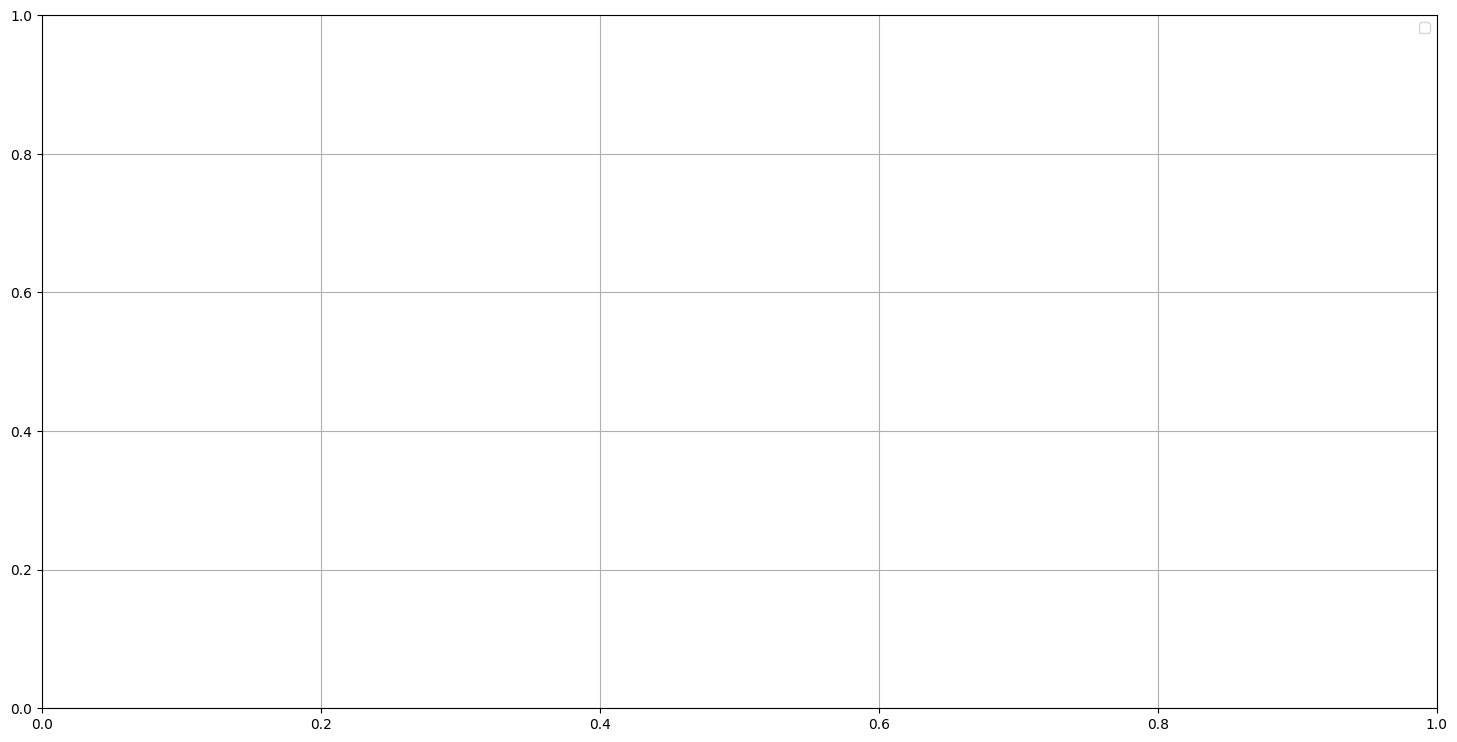

In [ ]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))

# Ensure that the 'TES_train' and 'TES_test' DataFrames are defined and populated with data
# Replace the following with your actual training and testing data
# plt.plot(TES_train['Price'], label='Train')
# plt.plot(TES_test['Price'], label='Test')

# Assuming your predictions are stored in DataFrames with corresponding column names
# Replace '...' with the actual variable and column names

# Complete the code to plot the predictions made by the linear regression model
# plt.plot(linear_regression_predictions['Column_Name'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
# plt.plot(trailing_MovingAverage_test['Moving_Average_Predictions'], label='Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
# plt.plot(SES_test['SES_Predictions'], label='Simple Exponential Smoothing', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
# plt.plot(DES_test['DES_Predictions'], label='Double Exponential Smoothing', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
# plt.plot(TES_test['TES_Predictions'], label='Triple Exponential Smoothing', color='purple')

#Complete the code to plot the predictions based on the Auto ARIMA model
# plt.plot(auto_arima_predictions['Column_Name'], label='Auto ARIMA', color='gray')

plt.legend(loc='best')
plt.grid();

In [ ]:
# Check and handle NaN values
TES_train = TES_train.fillna(method='ffill')
TES_test = TES_test.fillna(method='ffill')

# Generate predictions using the Auto ARIMA model
predicted_auto_ARIMA = results_auto_ARIMA.predict(start=len(TES_train), end=len(TES_train) + len(TES_test) - 1, dynamic=False)

# Find the RMSE between the actual and predicted values
rmse = mean_squared_error(TES_test['Price'], predicted_auto_ARIMA, squared=False)
print(rmse)


87.36383370379981


In [ ]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}, index=['Auto ARIMA'])
resultsDf

,RMSE
Auto ARIMA,87.363834


### ARIMA Model

In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools

# Define the range of AR and MA values based on ACF & PACF plots
p = range(0, 3)  # AR terms
q = range(0, 3)  # MA terms
d = range(1, 2)  # Differencing term, typically 1 for stationarity

# Generate all possible combinations of p, d, q
pdq = list(itertools.product(p, d, q))

print('Some parameter combinations for the Model...')
for i in range(1, len(pdq)):
    print('Model: {}'.format(pdq[i]))


Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
import statsmodels.api as sm

# Ensure that TES_train is used and not train
for param in pdq:
    ARIMA_model = sm.tsa.ARIMA(TES_train['Price'],order=param).fit() #Fit the ARIMA model
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))  #Complete the code to find teh AIC values
    # Use concat instead of append to add a new row to the DataFrame
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})], ignore_index=True)

ARIMA(0, 1, 0) - AIC:917.4293185297809
ARIMA(0, 1, 1) - AIC:916.4722743708053
ARIMA(0, 1, 2) - AIC:917.6698876683945
ARIMA(1, 1, 0) - AIC:916.1677536171564
ARIMA(1, 1, 1) - AIC:918.1651665718048
ARIMA(1, 1, 2) - AIC:917.4792443964951
ARIMA(2, 1, 0) - AIC:918.1615701949041
ARIMA(2, 1, 1) - AIC:918.818780687513
ARIMA(2, 1, 2) - AIC:918.4918477196924


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
5,"(1, 1, 2)",22.867510
4,"(1, 1, 1)",23.670408
7,"(2, 1, 1)",24.712995
3,"(1, 1, 0)",26.288036
6,"(2, 1, 0)",26.457437
8,"(2, 1, 2)",27.668472
2,"(0, 1, 2)",30.791200
1,"(0, 1, 1)",34.059104
0,"(0, 1, 0)",37.428404
12,"(1, 1, 0)",916.167754


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming TES_train is a DataFrame with a 'Price' column
# Replace (0, 1, 2) with the actual best parameters obtained from ARIMA_AIC.sort_values
ARIMA_model1 = sm.tsa.ARIMA(TES_train['Price'], order=(0, 1, 2))  # Build the ARIMA model based on the best params

results_ARIMA = ARIMA_model1.fit()  # Fit the ARIMA model

print(results_ARIMA.summary())  # Print the summary result

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   89
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -455.835
Date:                Sun, 15 Sep 2024   AIC                            917.670
Time:                        06:00:13   BIC                            925.102
Sample:                    08-31-2013   HQIC                           920.664
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2142      0.102      2.099      0.036       0.014       0.414
ma.L2          0.0972      0.121      0.806      0.420      -0.139       0.334
sigma2      1846.4225    240.707      7.671      0.0

In [ ]:
predicted_ARIMA = results_ARIMA.get_forecast(steps=len(test))  #Forecast the ARIMA model
predicted_ARIMA

In [ ]:
from sklearn.metrics import mean_squared_error

# Access the predicted values from the forecasted object
predicted_values = predicted_ARIMA.predicted_mean

# Ensure both arrays have the same length - use the length of predicted_values
rmse = mean_squared_error(test['Price'][:len(predicted_values)], predicted_values, squared=False)  #Find the RMSE on test data
print(rmse)

91.01328205077404


In [ ]:
print(trailing_MovingAverage_test.columns)


Index(['Price', 'Year', 'Trailing_2', 'Trailing_4', 'Trailing_6',
       'Trailing_9'],
      dtype='object')


In [ ]:
trailing_MovingAverage_test['Trailing_3_months_moving_average'] = TES_test['Price'].rolling(window=3).mean()


In [ ]:
# Replace 'your_dataframe' with the actual name of your DataFrame.
# For instance, if your DataFrame is named 'df', the code would look like this:
print(df.columns)

# If you intended to use one of the existing DataFrames, replace 'your_dataframe' with the correct name:
# print(TES_train.columns)
# print(TES_test.columns)
# print(trailing_MovingAverage_test.columns)
# etc.


Index(['Price', 'Year'], dtype='object')


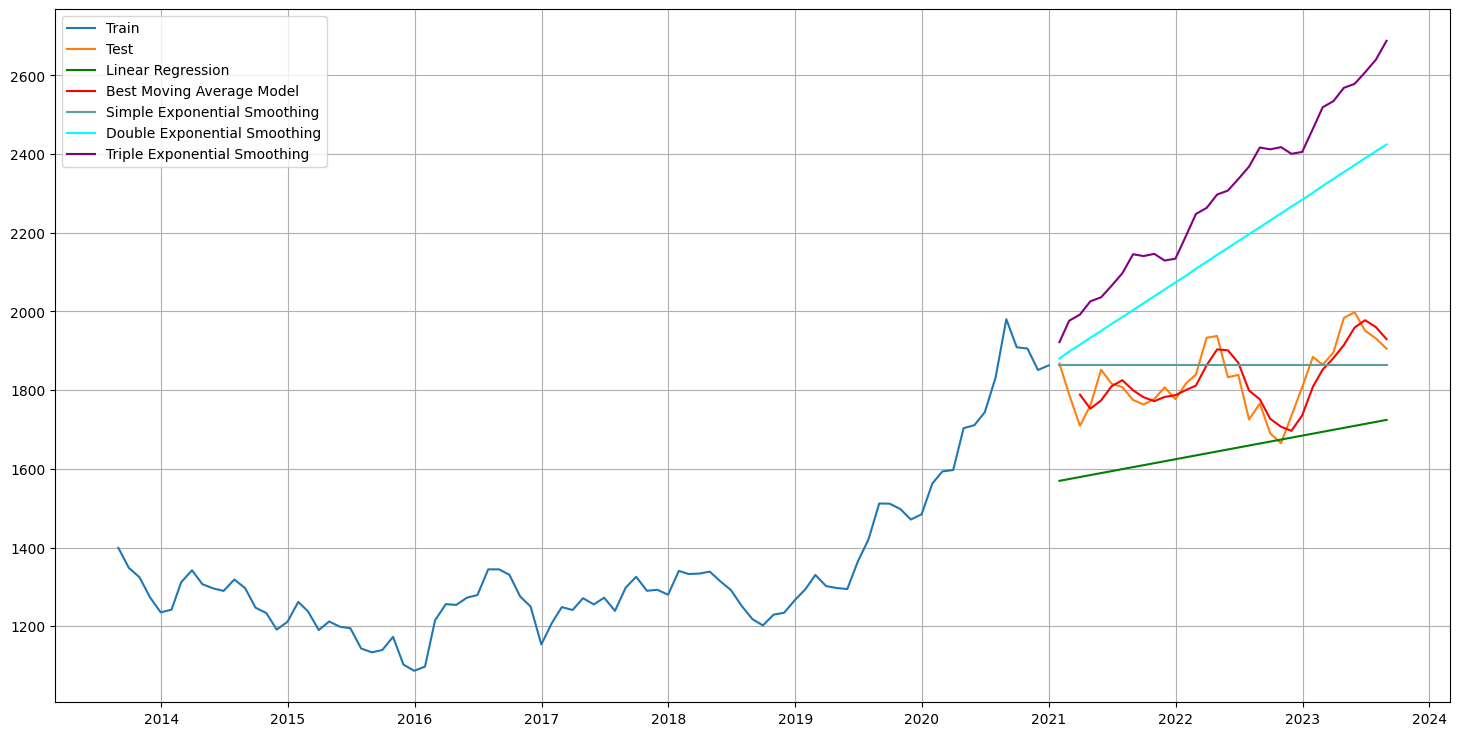

In [ ]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Price'], label='Train')
plt.plot(TES_test['Price'], label='Test')

# Assuming 'trailing_MovingAverage_test' is the DataFrame you want to store predictions in
trailing_MovingAverage_test['Linear_Predictions'] = predictions

# Now you can plot the predictions
plt.plot(trailing_MovingAverage_test['Linear_Predictions'], label='Linear Regression', color='green')

plt.plot(trailing_MovingAverage_test['Trailing_3_months_moving_average'], label='Best Moving Average Model', color='red') # Changed the column name to match the column that was created in ipython-input-123-3e3ed2edcc6b

# Assuming the column is 'SES_Predictions' or whatever the actual name is
plt.plot(SES_test['SES_Predictions'], label='Simple Exponential Smoothing', color='cadetblue')

plt.plot(DES_test['DES_Predictions'], label='Double Exponential Smoothing', color='cyan')

plt.plot(TES_test['TES_Predictions'], label='Triple Exponential Smoothing', color='purple')

plt.legend(loc='best')
plt.grid();



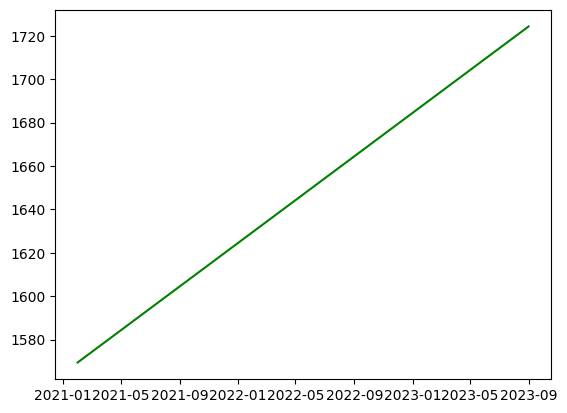

In [ ]:
# Generate predictions using the trained model
predictions = model.predict(X_test)

# Assuming 'trailing_MovingAverage_test' is the DataFrame you want to store predictions in
trailing_MovingAverage_test['Linear_Predictions'] = predictions

# Now you can plot the predictions
plt.plot(trailing_MovingAverage_test['Linear_Predictions'], label='Linear Regression', color='green')

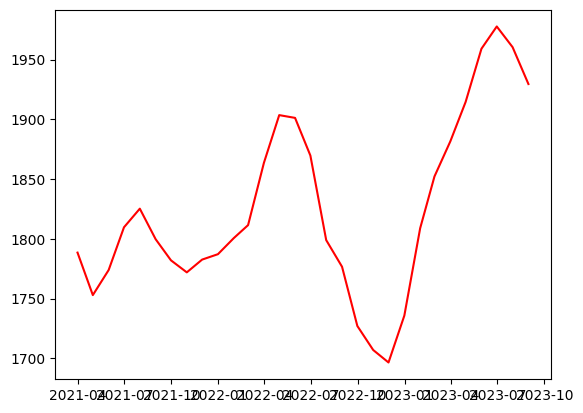

In [ ]:
plt.plot(trailing_MovingAverage_test['Trailing_3_months_moving_average'], label='Best Moving Average Model', color='red') # Changed the column name to match the column that was created in ipython-input-123-3e3ed2edcc6b

In [ ]:
print(trailing_MovingAverage_test.columns)


Index(['Price', 'Year', 'Trailing_2', 'Trailing_4', 'Trailing_6', 'Trailing_9',
       'Trailing_3_months_moving_average', 'Linear_Predictions'],
      dtype='object')


In [ ]:
# Example for 2-point moving average
trailing_MovingAverage_test['predictions'] = test['Price'].rolling(window=2).mean()


In [ ]:
print(SES_test.columns)



Index(['Price', 'Year', 'predict'], dtype='object')


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Assuming 'train' is your training data
model = SimpleExpSmoothing(train['Price']).fit()
SES_test['SES_Predictions'] = model.forecast(len(test))  # Forecast for the test set length


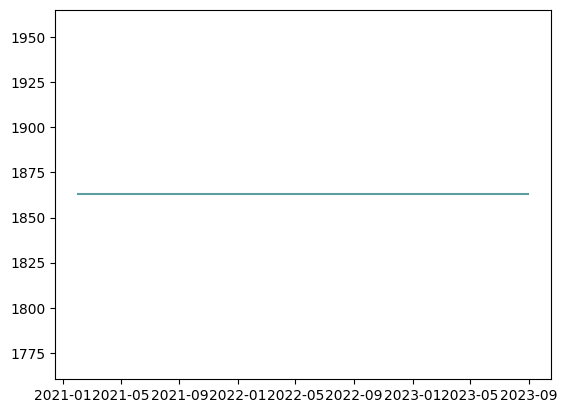

In [ ]:
# Assuming the column is 'SES_Predictions' or whatever the actual name is
plt.plot(SES_test['SES_Predictions'], label='Simple Exponential Smoothing', color='cadetblue')


In [ ]:
print(DES_test.columns)


Index([                                            'Price',
                                                    'Year',
                                     ('predict', 0.3, 0.3),
                                     ('predict', 0.3, 0.4),
                                     ('predict', 0.3, 0.5),
                      ('predict', 0.3, 0.6000000000000001),
                      ('predict', 0.3, 0.7000000000000002),
                      ('predict', 0.3, 0.8000000000000003),
                      ('predict', 0.3, 0.9000000000000001),
                      ('predict', 0.3, 1.0000000000000002),
                                     ('predict', 0.4, 0.3),
                                     ('predict', 0.4, 0.4),
                                     ('predict', 0.4, 0.5),
                      ('predict', 0.4, 0.6000000000000001),
                      ('predict', 0.4, 0.7000000000000002),
                      ('predict', 0.4, 0.8000000000000003),
                      ('predict', 0.4, 0

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'train' is your training data and 'test' is your test data
model = ExponentialSmoothing(train['Price'], trend='add').fit()
DES_test['DES_Predictions'] = model.forecast(len(test))  # Forecast for the test set length


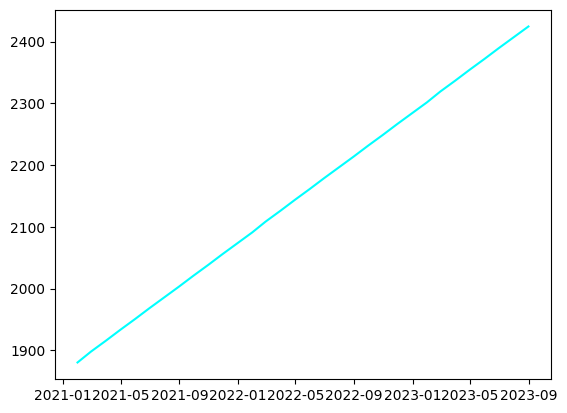

In [ ]:
plt.plot(DES_test['DES_Predictions'], label='Double Exponential Smoothing', color='cyan')



In [ ]:
print(TES_test.columns)


Index([                                                           'Price',
                                                                   'Year',
                                                           'auto_predict',
                                               ('predict', 0.3, 0.3, 0.3),
                                               ('predict', 0.3, 0.3, 0.4),
                                               ('predict', 0.3, 0.3, 0.5),
                                ('predict', 0.3, 0.3, 0.6000000000000001),
                                ('predict', 0.3, 0.3, 0.7000000000000002),
                                ('predict', 0.3, 0.3, 0.8000000000000003),
                                ('predict', 0.3, 0.3, 0.9000000000000001),
       ...
       'predict_1.0000000000000002_0.9000000000000001_0.9000000000000001',
       'predict_1.0000000000000002_0.9000000000000001_1.0000000000000002',
                      'predict_1.0000000000000002_1.0000000000000002_0.3',
              

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'train' is your training data and 'test' is your test data
model = ExponentialSmoothing(train['Price'], trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the values for the test set
TES_test['TES_Predictions'] = model.forecast(len(test))  # Ensure you replace 'test' with the correct test data if different


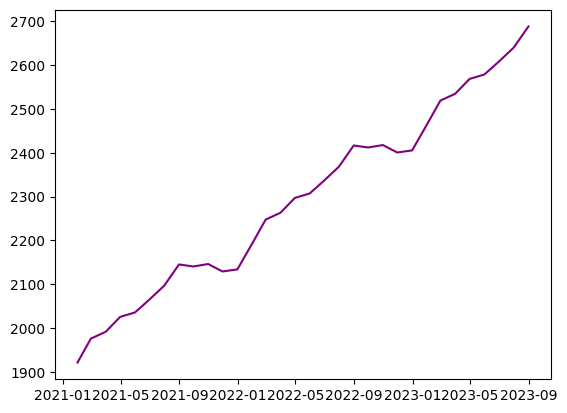

In [ ]:
plt.plot(TES_test['TES_Predictions'], label='Triple Exponential Smoothing', color='purple')



In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}, index=['']) # Use an empty string for the index

resultsDf = pd.concat([resultsDf, temp_resultsDf])

resultsDf

,RMSE
Auto ARIMA,87.363834
,91.013282


### Compare the Performance of the model & Forecast

In [ ]:
resultsDf.rename(columns={'Test RMSE':'RMSE'},inplace=True) #Fixed typo - results_Df to resultsDf
result = pd.concat([resultsDf, resultsDf]) #Fixed typo - results_Df to resultsDf
result.sort_values(by='RMSE')
result # Fixed typo - results to result

,RMSE
Auto ARIMA,87.363834
Auto ARIMA,87.363834


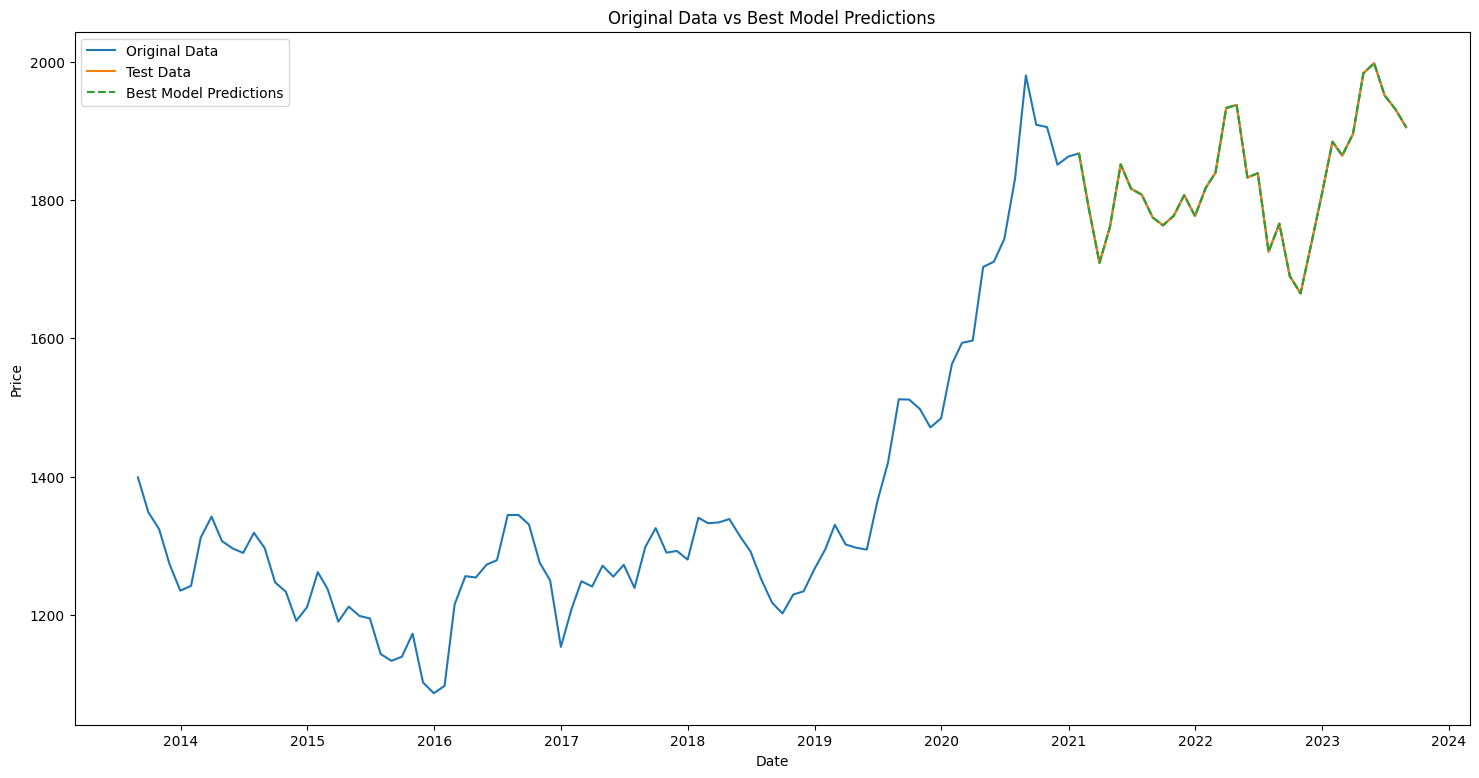

In [ ]:
# Assuming you've already identified the best model and its predictions
# and stored the predictions in a variable called 'arima_predictions'
# If the variable is named differently, replace 'arima_predictions'
# with the actual variable name
best_model_predictions = TES_test  # Replace with the actual best model predictions

# Plot the original data and the predictions of the best model
plt.figure(figsize=(18, 9))  # Optional: Set the figure size for better visibility
plt.plot(df['Price'], label='Original Data')
plt.plot(TES_test['Price'], label='Test Data') # Use TES_test for plotting test data
plt.plot(best_model_predictions['Price'], label='Best Model Predictions', linestyle='--')  # Plot the best model

plt.legend()
plt.title('Original Data vs Best Model Predictions')  # Title for the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


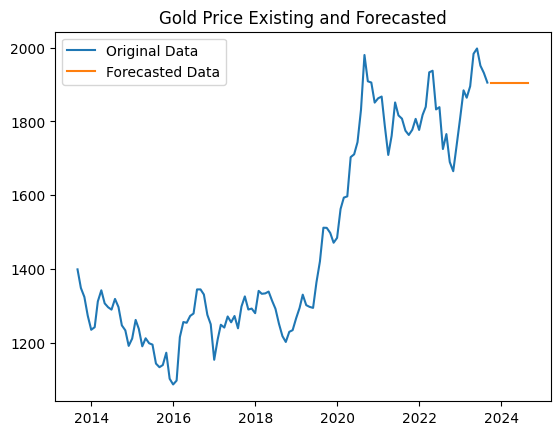

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming ExponentialSmoothing is the intended model
model_TES = ExponentialSmoothing(df['Price']) # Complete the code to build the best model to forecast

model_TES_alpha_i_j_k = model_TES.fit(optimized=True) # Complete the code to fit the model

predicted_results_final = model_TES_alpha_i_j_k.forecast(steps=12) # Complete the code to forecast for the next 12 months

plt.plot(df['Price'], label = 'Original Data')
plt.plot(predicted_results_final, label = 'Forecasted Data')
plt.legend(loc ='best')
plt.title('Gold Price Existing and Forecasted');